## Import necessary libraries

In [1]:
import pandas as pd
import librosa
import numpy as np
import pyloudnorm
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import noisereduce
import warnings
import parselmouth
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress FutureWarning for librosa.beat.tempo
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
train_csv = pd.read_csv('truncated_train.csv')

In [3]:
train_csv

filename  \
0      cv-valid-train/sample-000000.mp3   
1      cv-valid-train/sample-000001.mp3   
2      cv-valid-train/sample-000002.mp3   
3      cv-valid-train/sample-000003.mp3   
4      cv-valid-train/sample-000004.mp3   
...                                 ...   
14996  cv-valid-train/sample-014996.mp3   
14997  cv-valid-train/sample-014997.mp3   
14998  cv-valid-train/sample-014998.mp3   
14999  cv-valid-train/sample-014999.mp3   
15000  cv-valid-train/sample-015000.mp3   

                                                    text  up_votes  \
0      learn to recognize omens and follow them the o...         1   
1             everything in the universe evolved he said         1   
2      you came so that you could learn about your dr...         1   
3      so now i fear nothing because it was those ome...         1   
4      if you start your emails with greetings let me...         3   
...                                                  ...       ...   
14996                  we speak of them only to children         4   
14997  its been a long time since she last read chekh...         1   
14998  for at that time it had not occurred to him th...         1   
14999  yeah better if people are already familiar wit...         1   
15000     there was enough there to buy a lot of weapons         6   

       down_votes       age gender      accent  duration  
0               0       NaN    NaN         NaN       NaN  
1               0       NaN    NaN         NaN       NaN  
2               0       NaN    NaN         NaN       NaN  
3               0       NaN    NaN         NaN       NaN  
4               2       NaN    NaN         NaN       NaN  
...           ...       ...    ...         ...       ...  
14996           0       NaN    NaN         NaN       NaN  
14997           0       NaN    NaN         NaN       NaN  
14998           0  fourties   male  newzealand       NaN  
14999           0       NaN    NaN         NaN       NaN  
15000           0  twenties   male          us       NaN  

[15001 rows x 8 columns]

In [4]:
file_names = []
for index, row in train_csv.iterrows():
    file_names.append(row['filename'])

In [464]:
feature_dict = {
    'F0_Mean': [],
    'F0_Median': [],
    'F0_Std': [],
    'F0_5th_Percentile': [],
    'F0_95th_Percentile': [],
    'Loudness': [],
    'Number_of_Words': [],
    'Duration': [],
    'Words_per_Second': [],
    'Tempo': [],
    'STFT_Mean': [],
    'STFT_Median': [],
    'STFT_Std': [],
    'MFCC': []
}

### Extracting features for training data set

In [ ]:
for i in range(len(file_names)):
    audio, sr = librosa.load(file_names[i])
    audio, index = librosa.effects.trim(audio,top_db=20)
    sound = parselmouth.Sound(audio, sr)
    
    # Fundamental frequency (F0) analysis
    pitch = sound.to_pitch()
    # Filter out NaN values
    pitch_values = pitch.selected_array['frequency']
    valid_pitch_values = pitch_values[~np.isnan(pitch_values) & (pitch_values != 0)]
    feature_dict['F0_Mean'].append(np.nanmean(valid_pitch_values))
    feature_dict['F0_Median'].append(np.nanmedian(valid_pitch_values))
    feature_dict['F0_Std'].append(np.nanstd(valid_pitch_values))
    feature_dict['F0_5th_Percentile'].append(np.nanpercentile(valid_pitch_values, 5))
    feature_dict['F0_95th_Percentile'].append(np.nanpercentile(valid_pitch_values, 95))
    
    # Loudness analysis
    intensity = sound.to_intensity()
    loudness = np.nanmean(intensity.values[0])
    feature_dict['Loudness'].append(loudness)
    
    # Word detection
    nwords = len(librosa.onset.onset_detect(y=audio, sr=sr, units="time", hop_length=128, backtrack=False))
    feature_dict['Number_of_Words'].append(nwords)
    
    # Duration and words per second
    duration = len(audio) / sr
    words_per_second = nwords / duration
    feature_dict['Duration'].append(duration)
    feature_dict['Words_per_Second'].append(words_per_second)
    
    # Tempo estimation
    tempo = librosa.beat.tempo(y=audio, sr=sr)[0]
    feature_dict['Tempo'].append(tempo)
    
    # Short-Time Fourier Transform (STFT) analysis
    stft = np.abs(librosa.stft(audio))
    feature_dict['STFT_Mean'].append(np.nanmean(stft))
    feature_dict['STFT_Median'].append(np.median(stft))
    feature_dict['STFT_Std'].append(np.std(stft))

    # MFCC
    mfcc_array = librosa.feature.mfcc(y=audio, sr=sr)
    feature_dict['MFCC'].append(np.nanmean(mfcc_array))
    
    print(f"File {i} features extracted! YAY!")

### Extracting features for test data set

In [6]:
test_csv = pd.read_csv('cv-valid-test.csv')

In [7]:
file_names_test = []
for index, row in test_csv.iterrows():
    file_names_test.append(row['filename'])

In [318]:
feature_dict_test = {
    'F0_Mean': [],
    'F0_Median': [],
    'F0_Std': [],
    'F0_5th_Percentile': [],
    'F0_95th_Percentile': [],
    'Loudness': [],
    'Number_of_Words': [],
    'Duration': [],
    'Words_per_Second': [],
    'Tempo': [],
    'STFT_Mean': [],
    'STFT_Median': [],
    'STFT_Std': [],
    'MFCC': []
}

In [ ]:
for i in range(len(file_names_test)):
    audio, sr = librosa.load(file_names_test[i])
    audio, index = librosa.effects.trim(audio,top_db=20)
    sound = parselmouth.Sound(audio, sr)
    
    # Fundamental frequency (F0) analysis
    pitch = sound.to_pitch()
    # Filter out NaN values
    pitch_values = pitch.selected_array['frequency']
    valid_pitch_values = pitch_values[~np.isnan(pitch_values) & (pitch_values != 0)]
    feature_dict_test['F0_Mean'].append(np.nanmean(valid_pitch_values))
    feature_dict_test['F0_Median'].append(np.nanmedian(valid_pitch_values))
    feature_dict_test['F0_Std'].append(np.nanstd(valid_pitch_values))
    feature_dict_test['F0_5th_Percentile'].append(np.nanpercentile(valid_pitch_values, 5))
    feature_dict_test['F0_95th_Percentile'].append(np.nanpercentile(valid_pitch_values, 95))
    
    # Loudness analysis
    intensity = sound.to_intensity()
    loudness = np.nanmean(intensity.values[0])
    feature_dict_test['Loudness'].append(loudness)
    
    # Word detection
    nwords = len(librosa.onset.onset_detect(y=audio, sr=sr, units="time", hop_length=128, backtrack=False))
    feature_dict_test['Number_of_Words'].append(nwords)
    
    # Duration and words per second
    duration = len(audio) / sr
    words_per_second = nwords / duration
    feature_dict_test['Duration'].append(duration)
    feature_dict_test['Words_per_Second'].append(words_per_second)
    
    # Tempo estimation
    tempo = librosa.beat.tempo(y=audio, sr=sr)[0]
    feature_dict_test['Tempo'].append(tempo)
    
    # Short-Time Fourier Transform (STFT) analysis
    stft = np.abs(librosa.stft(audio))
    feature_dict_test['STFT_Mean'].append(np.nanmean(stft))
    feature_dict_test['STFT_Median'].append(np.median(stft))
    feature_dict_test['STFT_Std'].append(np.std(stft))

    # MFCC
    mfcc_array = librosa.feature.mfcc(y=audio, sr=sr)
    feature_dict_test['MFCC'].append(np.nanmean(mfcc_array))
    
    print(f"File {i} features extracted! YAY!")

In [321]:
test_df = pd.DataFrame.from_dict(feature_dict_test)

In [466]:
df = pd.DataFrame.from_dict(feature_dict)
df

F0_Mean   F0_Median      F0_Std  F0_5th_Percentile  \
0      112.909521  104.384917   32.189246          90.184065   
1      140.584319  130.095506   72.779049          96.540527   
2      153.259853  138.658002   71.480377         121.535775   
3      222.960682  217.511666   45.131419         185.126023   
4      215.141465  214.083491   27.045431         175.968979   
...           ...         ...         ...                ...   
14996  151.699242  155.271275   28.911890          92.421640   
14997  129.966639  103.636161   89.034636          89.737482   
14998  117.133389  101.647269   71.992703          76.246056   
14999  112.591446  110.213349   21.904726          82.017150   
15000  135.410700  105.051304  109.391970          95.935957   

       F0_95th_Percentile   Loudness  Number_of_Words  Duration  \
0              143.489029  67.864264               23  3.482993   
1              165.985373  29.539421               14  3.831293   
2              175.809941  62.066831               20  4.365351   
3              263.465424  46.560491               22  4.713651   
4              256.918162  86.240361               27  3.761633   
...                   ...        ...              ...       ...   
14996          194.658136  68.337998               12  1.927256   
14997          409.798259  58.591332               44  8.962902   
14998          163.503703  68.395173               13  3.482993   
14999          151.706220  66.433429               22  5.688889   
15000          467.685883  70.950594               14  2.600635   

       Words_per_Second       Tempo  STFT_Mean  STFT_Median   STFT_Std  \
0              6.603516  184.570312   0.661880     0.070379   2.367034   
1              3.654119  135.999178   0.013826     0.001312   0.093703   
2              4.581533  123.046875   0.400832     0.062567   1.600308   
3              4.667295   99.384014   0.051649     0.005137   0.371869   
4              7.177734   99.384014   3.258051     0.807335  13.783183   
...                 ...         ...        ...          ...        ...   
14996          6.226468   92.285156   0.371965     0.026242   2.433715   
14997          4.909124  117.453835   0.227874     0.035503   1.311719   
14998          3.732422  172.265625   0.721348     0.065395   3.141534   
14999          3.867188  123.046875   0.673066     0.050323   3.499193   
15000          5.383301  117.453835   0.732822     0.055678   3.555676   

            MFCC  
0     -10.119594  
1     -28.165047  
2     -12.031752  
3     -22.873674  
4      -1.672349  
...          ...  
14996 -10.990005  
14997 -10.542928  
14998  -5.232552  
14999 -10.027693  
15000  -8.406545  

[15001 rows x 14 columns]

In [467]:
df.to_excel("training_data_features.xlsx", index=False)

In [322]:
test_df.to_excel("testing_data_features.xlsx", index=False)

# Run from here pls

In [8]:
df = pd.read_excel('training_data_features.xlsx')
test_df = pd.read_excel('testing_data_features.xlsx')

# Data Preprocessing

## Merging the the features CSV with the train csv provided

In [9]:
new_df = pd.concat([train_csv, df], axis=1)
new_test_df = pd.concat([test_csv, test_df], axis=1)

## Dropping the duration column as we have a new duration column

In [10]:
new_df = new_df.drop('duration', axis=1)
new_test_df = new_test_df.drop('duration',axis=1)

## We found out that there are four rows in the pitch columns with null values so we can easily drop them as they are 4/15000

In [11]:
new_df.isnull().sum()

filename                  0
text                      0
up_votes                  0
down_votes                0
age                    9386
gender                 9375
accent                10068
F0_Mean                   4
F0_Median                 4
F0_Std                    4
F0_5th_Percentile         4
F0_95th_Percentile        4
Loudness                  0
Number_of_Words           0
Duration                  0
Words_per_Second          0
Tempo                     0
STFT_Mean                 0
STFT_Median               0
STFT_Std                  0
MFCC                      0
dtype: int64

In [12]:
# Find rows with NaN values in the specified column
nan_rows = new_df[new_df['F0_Mean'].isna()]

# Get the indices of rows with NaN values in the specified column
nan_indices = nan_rows.index

In [13]:
print(f"Rows : {nan_indices.values}")

Rows : [ 4529 11203 13235 14347]


In [14]:
new_df = new_df.drop(nan_indices)

## Identifying null values in thew whole dataset

In [15]:
null_count = new_df.isnull().sum(axis=1)
rows_with_null_count = (null_count > 0).sum()
rows_with_null_count

10176

## First we will try by dropping all the nan values from the dataset

In [16]:
df_by_dropping_nan_valuess = new_df.dropna()

In [17]:
df_by_dropping_nan_values = df_by_dropping_nan_valuess.copy()

## Vizualization of Features

## Converting categorical data into numerical data

First we will convert gender to binary data

In [18]:
df_by_dropping_nan_values['gender'] = df_by_dropping_nan_valuess['gender'].replace({'male': 1, 'female': 0})

Now we will map the ages onto numerical values

In [19]:
# Define a mapping dictionary for age categories
age_mapping = {
    'teens': 0,
    'twenties': 1,
    'thirties': 2,
    'fourties': 3,
    'fifties': 4,
    'sixties': 5,
    'seventies': 6,
    'eighties': 7,
    'nineties': 8
}
df_by_dropping_nan_values['age'] = df_by_dropping_nan_valuess['age'].map(age_mapping)

Now we will map the accent onto numerical values

In [20]:
# Define a mapping dictionary for accent categories
accent_mapping = {
    'us': 0,
    'australia': 1,
    'england': 2,
    'canada': 3,
    'philippines': 4,
    'hongkong': 5,
    'indian': 6,
    'ireland': 7,
    'malaysia': 8,
    'newzealand': 9
}
df_by_dropping_nan_values['accent'] = df_by_dropping_nan_valuess['accent'].map(accent_mapping)

### Feature Distribution

In [21]:
features_to_display = [
    'age','accent',
    'F0_Mean', 'F0_Median', 'F0_Std', 'F0_5th_Percentile', 'F0_95th_Percentile',
    'Loudness', 'Number_of_Words', 'Duration', 'Words_per_Second', 'Tempo',
    'STFT_Mean', 'STFT_Median', 'STFT_Std', 'MFCC'
]

### Distribution of Age

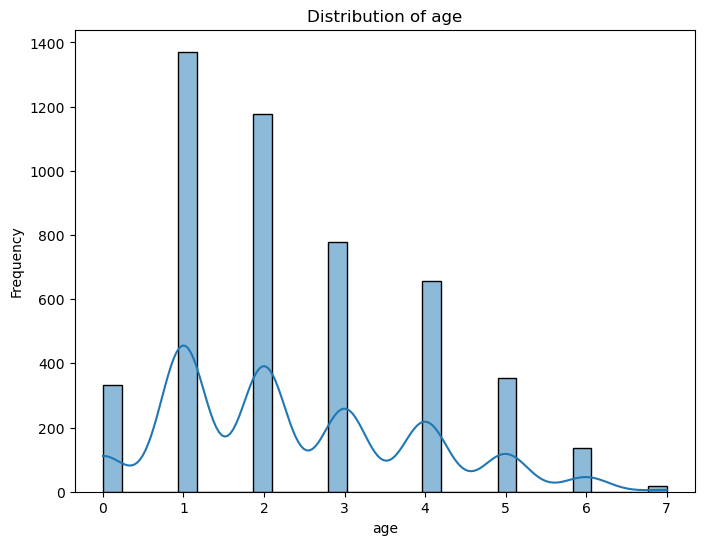

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[0]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[0]}')
plt.xlabel(features_to_display[0])
plt.ylabel('Frequency')
plt.show()

### Distribution of Accent

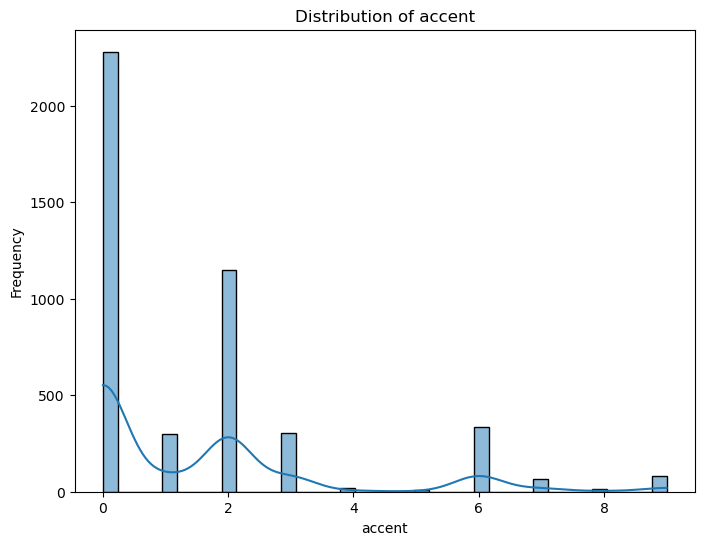

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[1]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[1]}')
plt.xlabel(features_to_display[1])
plt.ylabel('Frequency')
plt.show()

### Distribution of F0_Mean

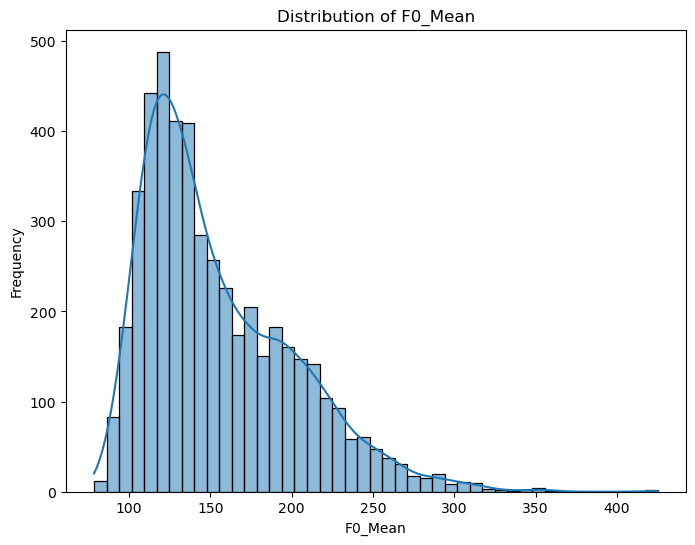

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[2]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[2]}')
plt.xlabel(features_to_display[2])
plt.ylabel('Frequency')
plt.show()

### Distribution of F0_Median

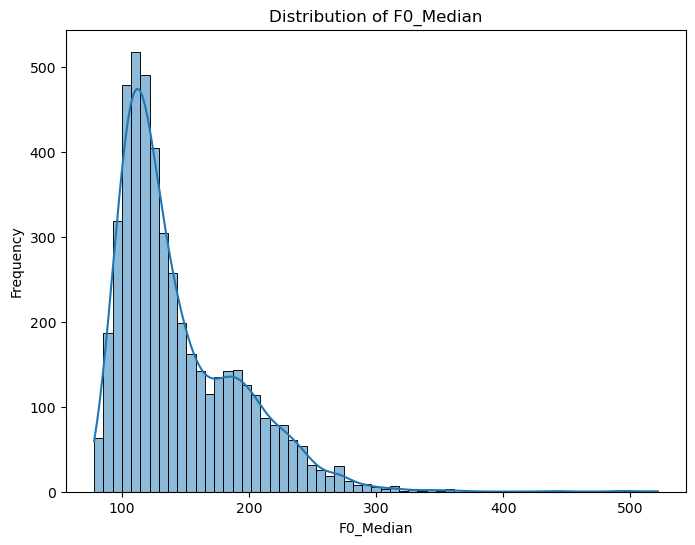

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[3]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[3]}')
plt.xlabel(features_to_display[3])
plt.ylabel('Frequency')
plt.show()

### Distribution of F0_Std

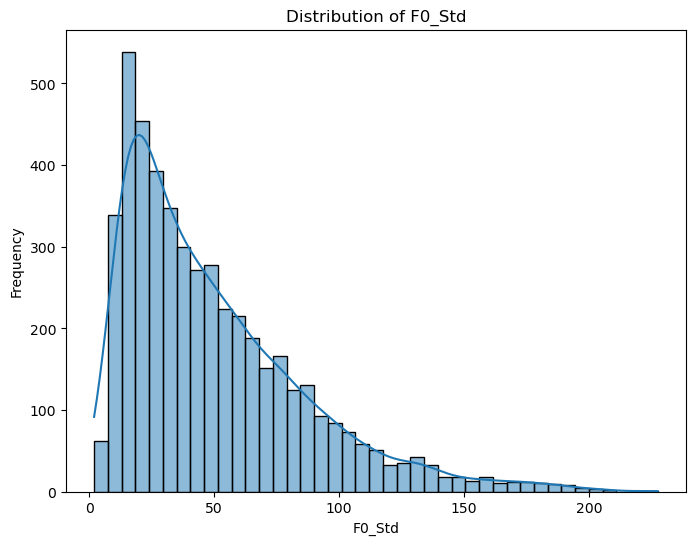

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[4]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[4]}')
plt.xlabel(features_to_display[4])
plt.ylabel('Frequency')
plt.show()

### Distribution of F0_5th_Percentile

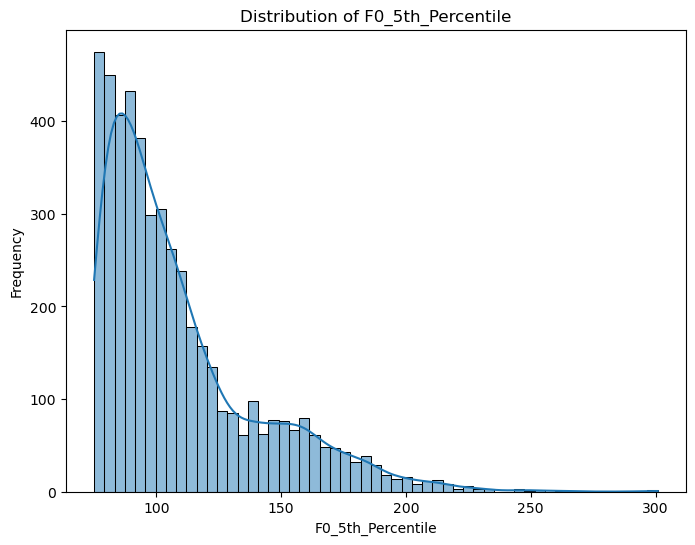

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[5]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[5]}')
plt.xlabel(features_to_display[5])
plt.ylabel('Frequency')
plt.show()

### Distribution of F0_95th_Percentile

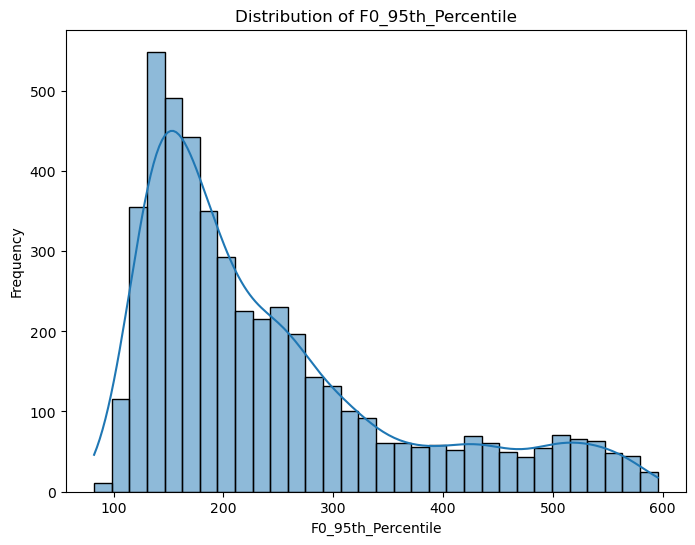

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[6]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[6]}')
plt.xlabel(features_to_display[6])
plt.ylabel('Frequency')
plt.show()

### Distribution of Loudness

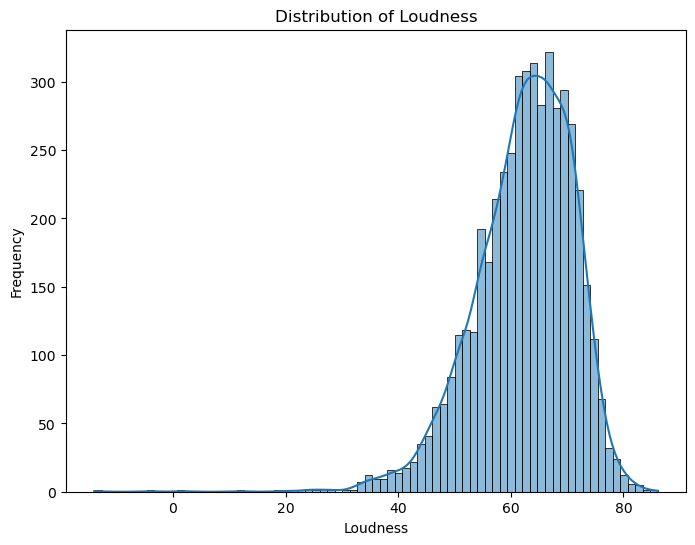

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[7]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[7]}')
plt.xlabel(features_to_display[7])
plt.ylabel('Frequency')
plt.show()

### Distribution of Number_of_Words

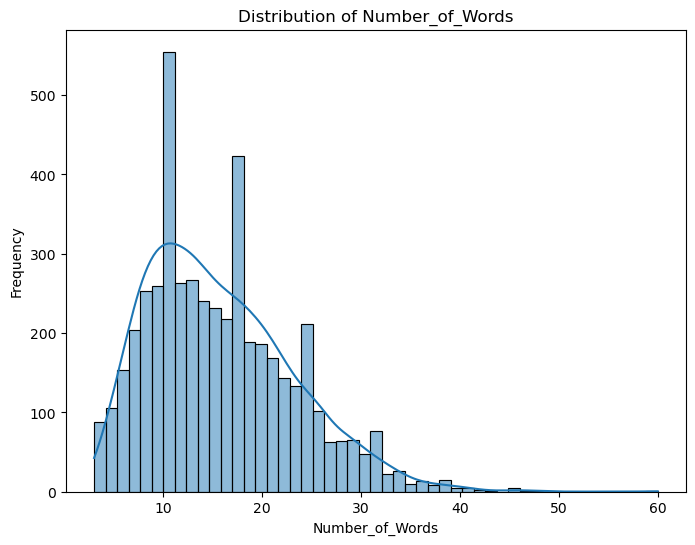

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[8]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[8]}')
plt.xlabel(features_to_display[8])
plt.ylabel('Frequency')
plt.show()

### Distribution of Duration

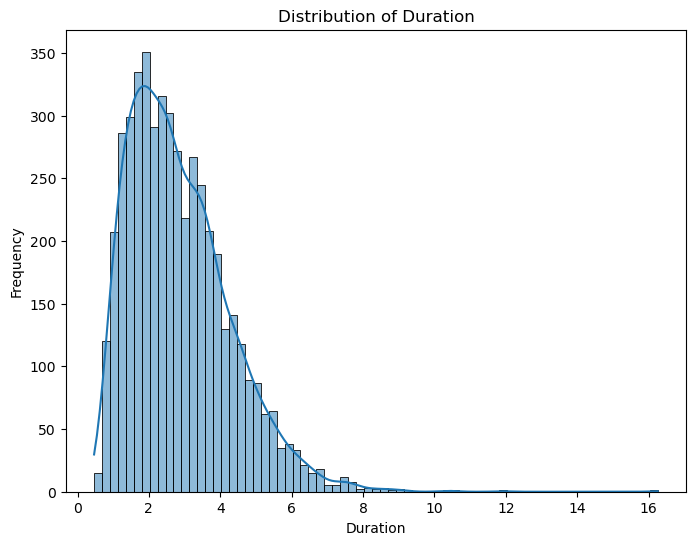

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[9]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[9]}')
plt.xlabel(features_to_display[9])
plt.ylabel('Frequency')
plt.show()

### Distribution of Words Per Second

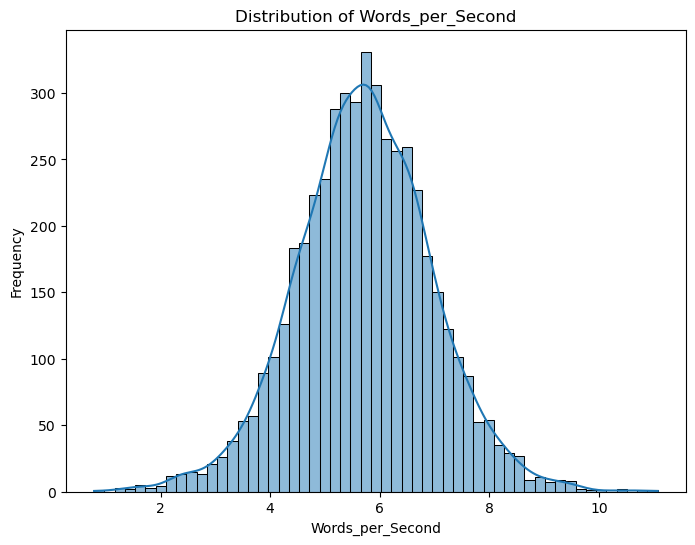

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[10]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[10]}')
plt.xlabel(features_to_display[10])
plt.ylabel('Frequency')
plt.show()

### Distribution of Tempo

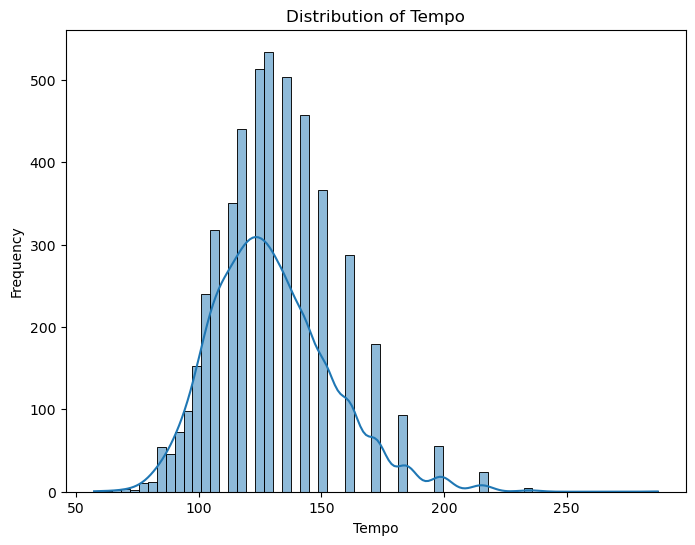

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[11]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[11]}')
plt.xlabel(features_to_display[11])
plt.ylabel('Frequency')
plt.show()

### Distribution of STFT_Mean

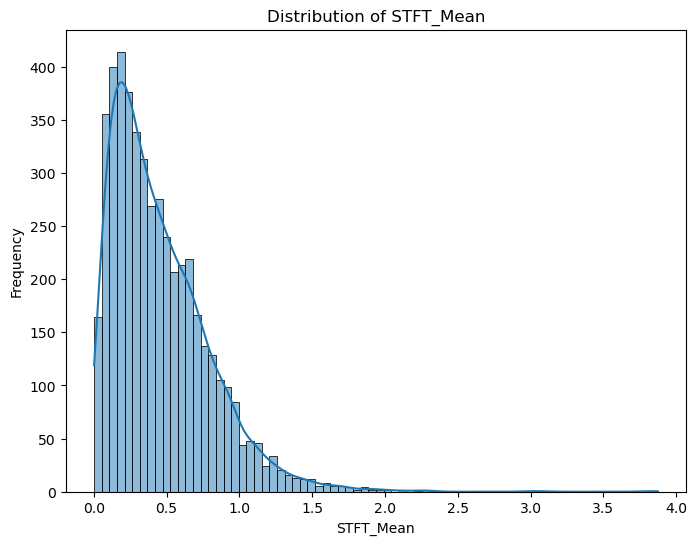

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[12]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[12]}')
plt.xlabel(features_to_display[12])
plt.ylabel('Frequency')
plt.show()

### Distribution of STFT_Median

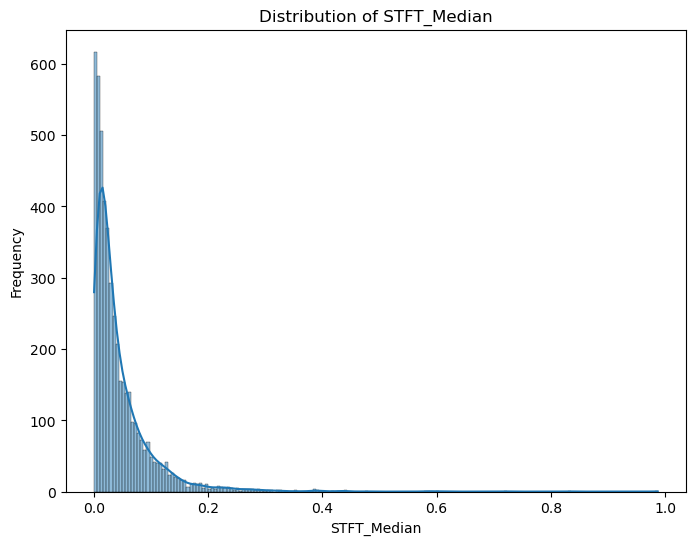

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[13]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[13]}')
plt.xlabel(features_to_display[13])
plt.ylabel('Frequency')
plt.show()

### Distribution of STFT_STD

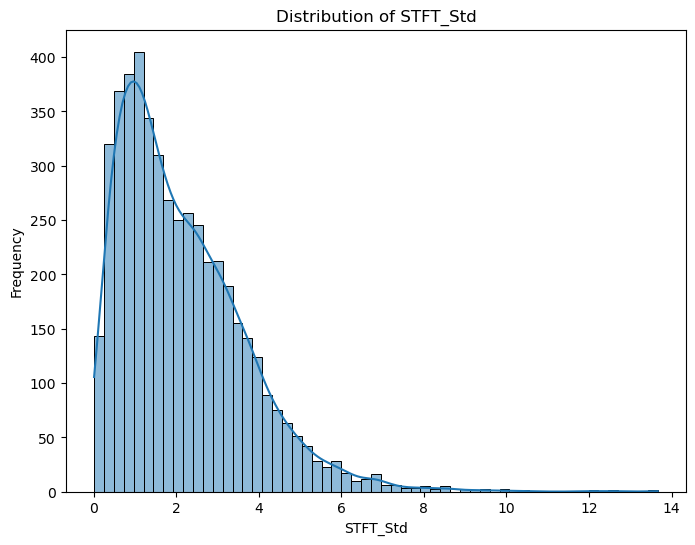

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[14]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[14]}')
plt.xlabel(features_to_display[14])
plt.ylabel('Frequency')
plt.show()

### Distribution of MFCC

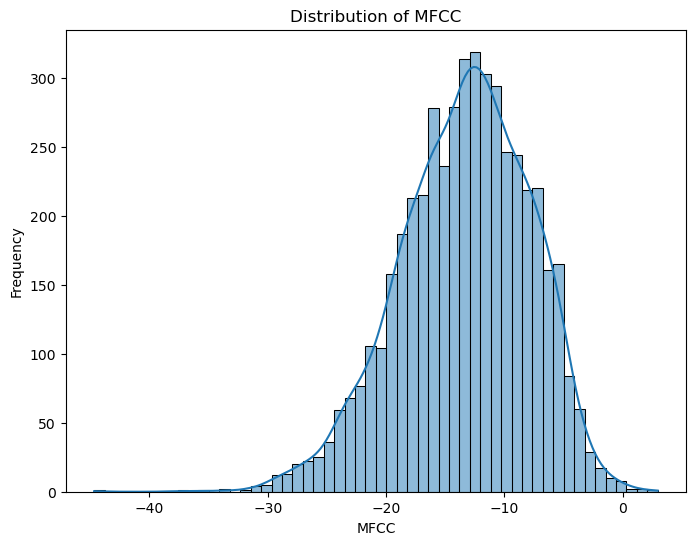

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df_by_dropping_nan_values[features_to_display[15]], kde=True)  # Use sns.histplot() for density plot
plt.title(f'Distribution of {features_to_display[15]}')
plt.xlabel(features_to_display[15])
plt.ylabel('Frequency')
plt.show()

### Features vs Target Scatter Plots

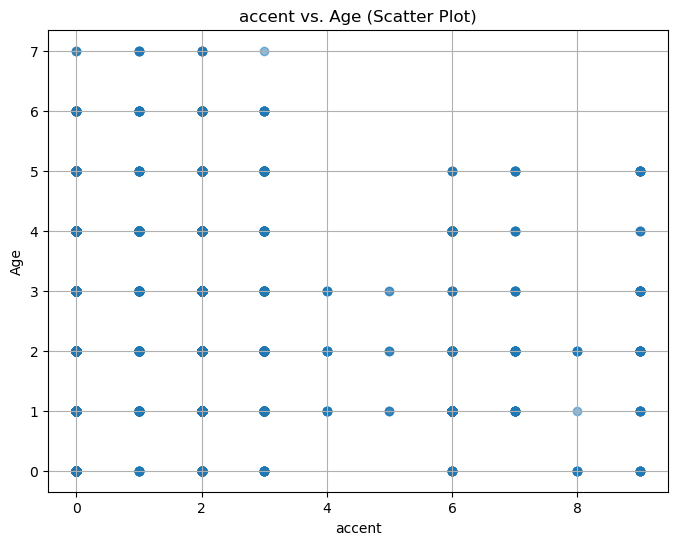

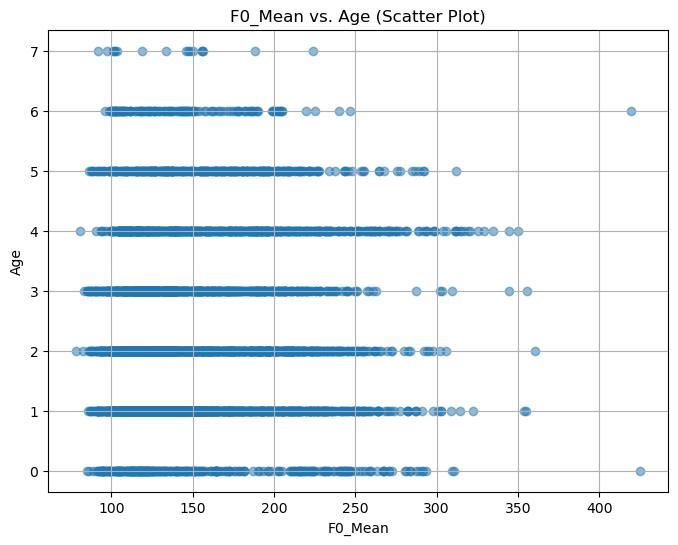

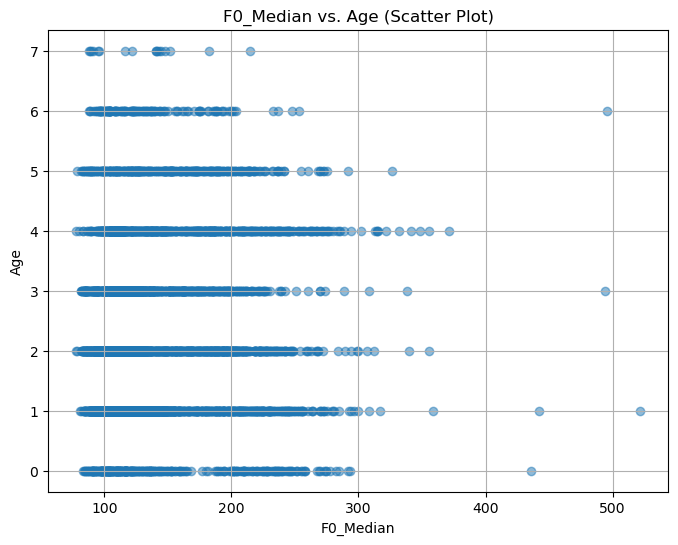

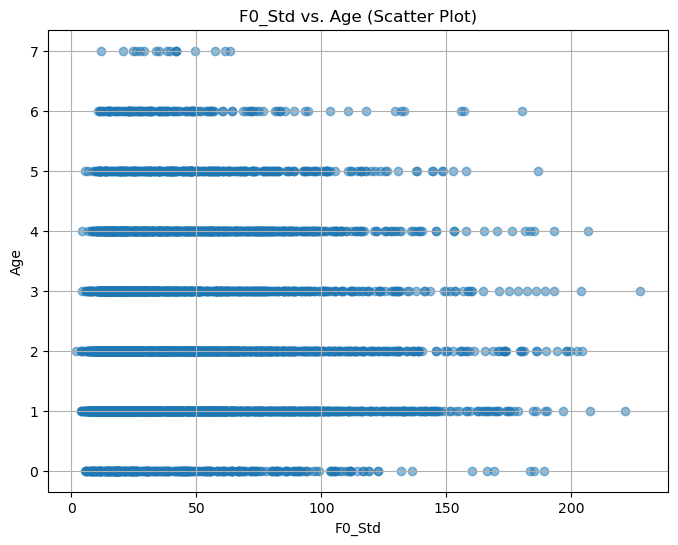

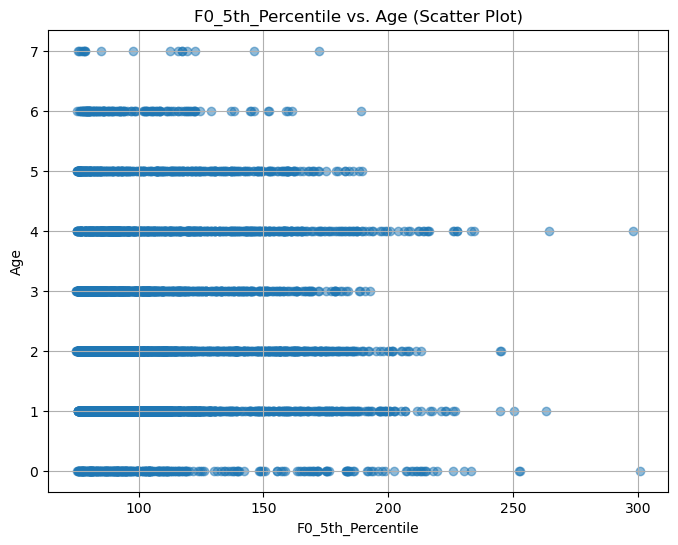

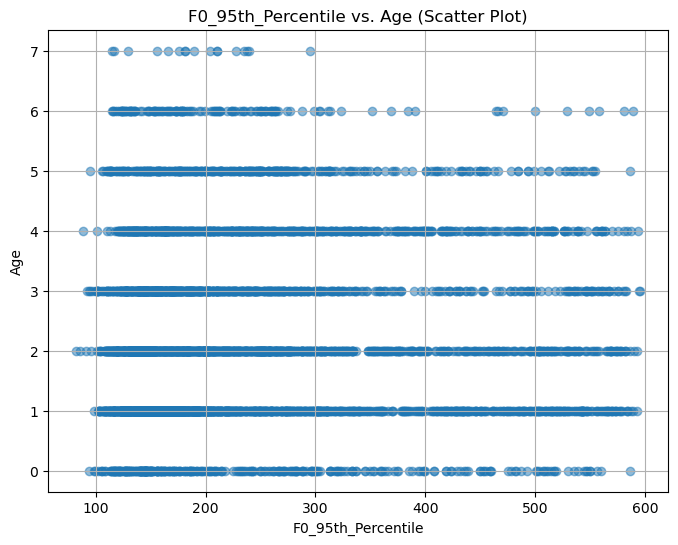

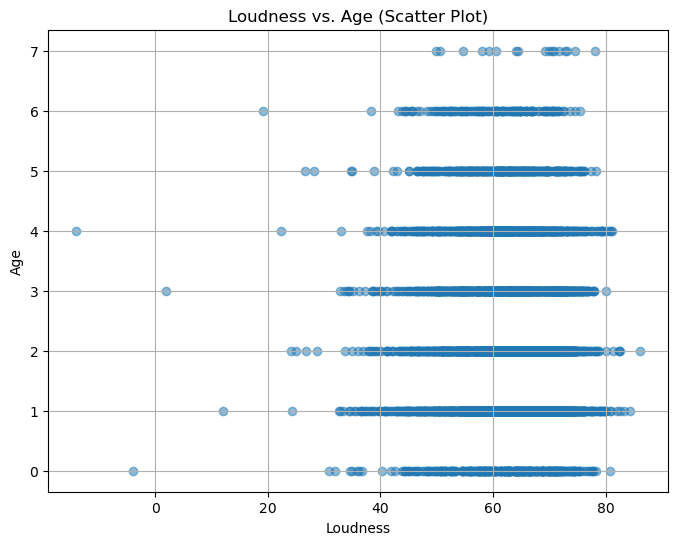

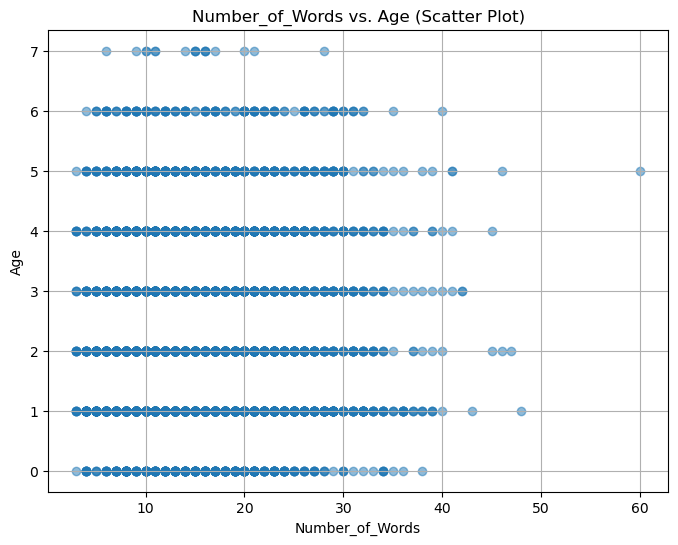

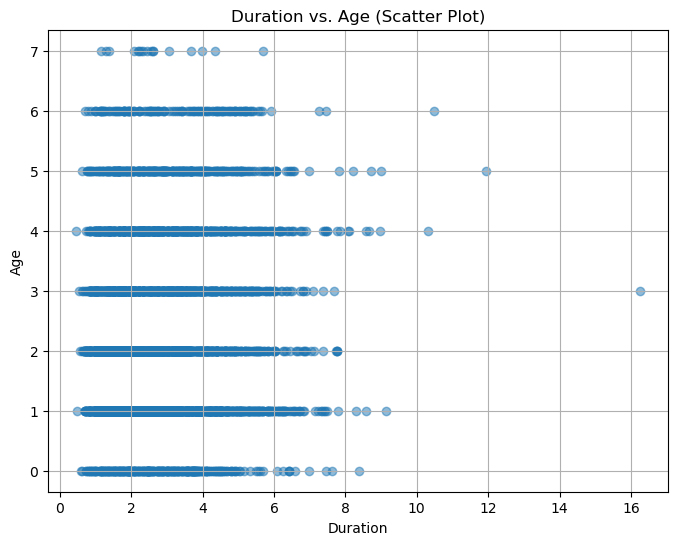

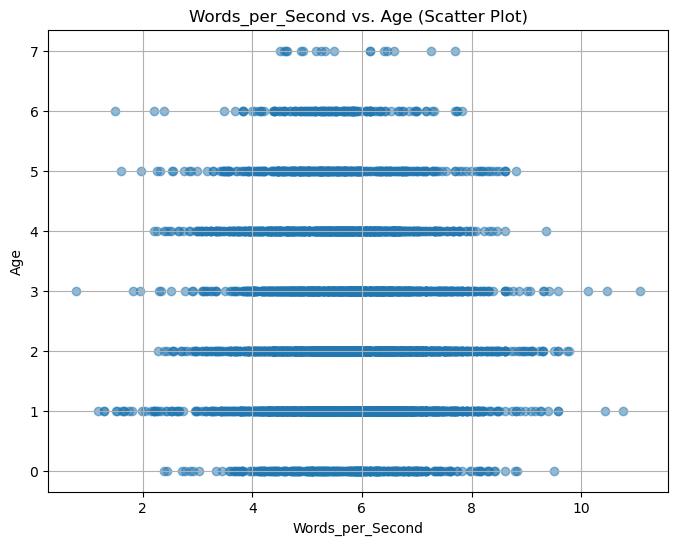

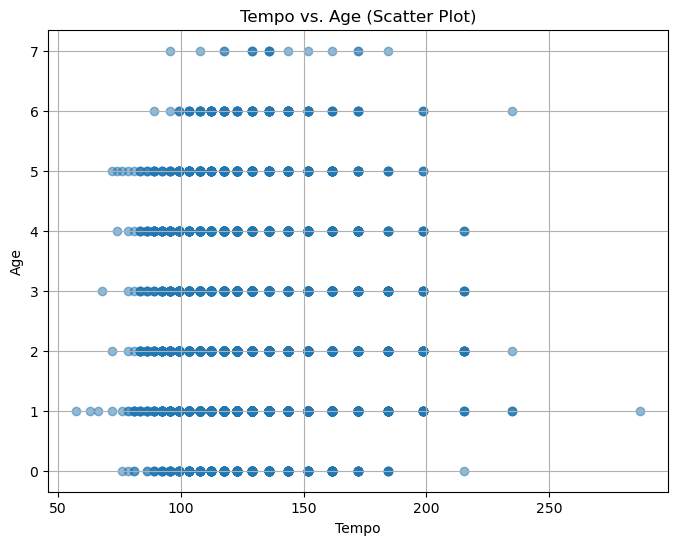

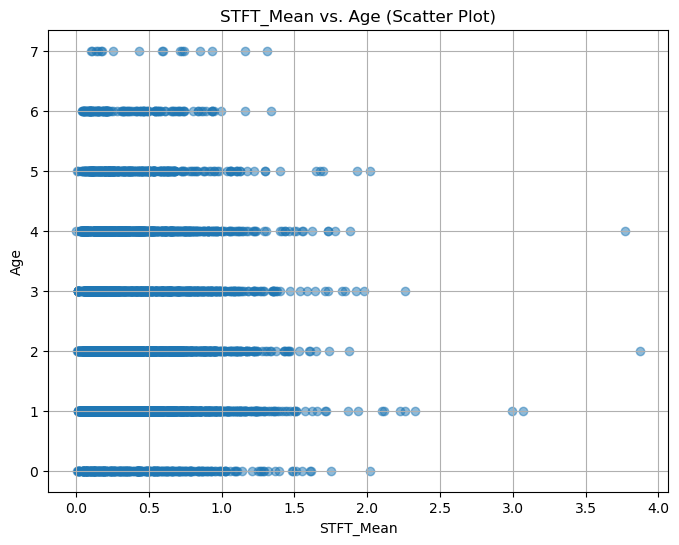

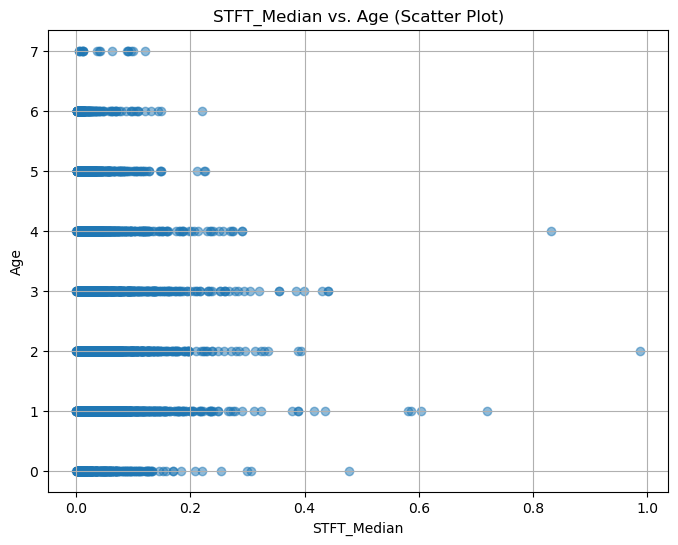

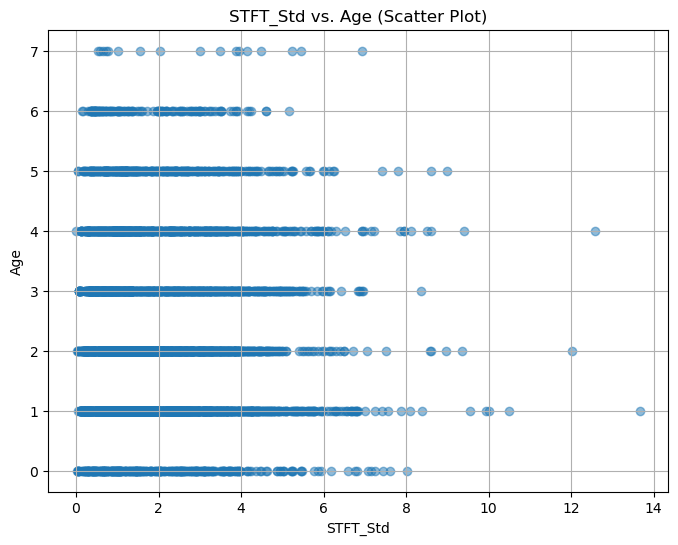

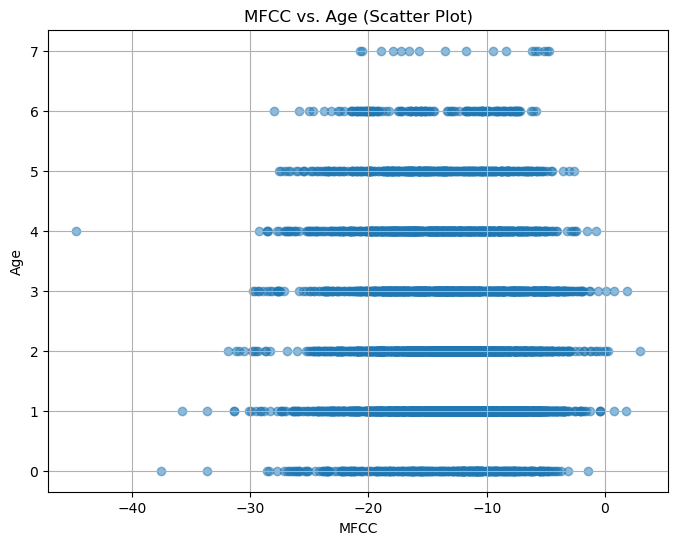

In [39]:
# Scatter plot
for i in range(len(features_to_display)):
    if i==0:
        continue
    plt.figure(figsize=(8, 6))
    plt.scatter(df_by_dropping_nan_values[features_to_display[i]], df_by_dropping_nan_values['age'], alpha=0.5)
    plt.title(f'{features_to_display[i]} vs. Age (Scatter Plot)')
    plt.xlabel(features_to_display[i])
    plt.ylabel('Age')
    plt.grid(True)
    plt.show()

## Normalization

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

I'm normalizing my data by zero scaling it i.e using the formula (value-mean)/standard_deviation

In [23]:
standard_scaler = StandardScaler()
# min_max_scaler = MinMaxScaler()

In [24]:
columns_to_normalize = [
    'F0_Mean', 'F0_Median', 'F0_Std', 'F0_5th_Percentile', 'F0_95th_Percentile',
    'Loudness', 'Number_of_Words', 'Duration', 'Words_per_Second', 'Tempo',
    'STFT_Mean', 'STFT_Median', 'STFT_Std', 'MFCC'
]

In [25]:
normalized_df = df_by_dropping_nan_values.copy()

In [26]:
normalized_df[columns_to_normalize] = standard_scaler.fit_transform(df_by_dropping_nan_values[columns_to_normalize])

In [27]:
np.mean(normalized_df['F0_Median'])

-1.03169449291033e-17

In [28]:
normalized_df

filename  \
5      cv-valid-train/sample-000005.mp3   
8      cv-valid-train/sample-000008.mp3   
13     cv-valid-train/sample-000013.mp3   
14     cv-valid-train/sample-000014.mp3   
19     cv-valid-train/sample-000019.mp3   
...                                 ...   
14993  cv-valid-train/sample-014993.mp3   
14994  cv-valid-train/sample-014994.mp3   
14995  cv-valid-train/sample-014995.mp3   
14998  cv-valid-train/sample-014998.mp3   
15000  cv-valid-train/sample-015000.mp3   

                                                    text  up_votes  \
5      a shepherd may like to travel but he should ne...         1   
8                          put jackie right on the staff         3   
13     but he had found a guide and didn't want to mi...         1   
14     as they began to decorate the hallway a silhou...         1   
19      then they got ahold of some dough and went goofy         1   
...                                                  ...       ...   
14993  but the marketplace was empty and he was far f...         1   
14994  i have already described the appearance of tha...         2   
14995      i'm afraid i already know a great many people         2   
14998  for at that time it had not occurred to him th...         1   
15000     there was enough there to buy a lot of weapons         6   

       down_votes  age gender  accent   F0_Mean  F0_Median    F0_Std  ...  \
5               0    1      0     0.0  0.917629   1.061273 -0.707529  ...   
8               0    6      1     0.0  0.496630  -0.296573  2.285445  ...   
13              0    2      0     0.0  0.994944   1.121984 -0.609479  ...   
14              0    5      1     2.0  0.461916   0.375973 -0.059732  ...   
19              0    4      1     1.0 -0.078919  -0.836219  2.414163  ...   
...           ...  ...    ...     ...       ...        ...       ...  ...   
14993           0    3      1     0.0 -0.319263  -0.089762 -0.676903  ...   
14994           0    2      0     3.0  0.080903   0.259150 -0.000775  ...   
14995           0    2      1     0.0 -0.815392  -0.811321  0.158654  ...   
14998           0    3      1     9.0 -0.810252  -0.888520  0.607241  ...   
15000           0    1      1     0.0 -0.416926  -0.816447  1.632039  ...   

       F0_95th_Percentile  Loudness  Number_of_Words  Duration  \
5                0.097084 -1.740979         0.711101  0.905097   
8                2.630349 -0.910580        -1.048556 -1.026381   
13               0.119366  0.183638        -0.236407  0.283095   
14               0.063141  0.244051         1.252534  0.708675   
19               2.674367  0.315059        -0.101048  0.414043   
...                   ...       ...              ...       ...   
14993           -0.529775 -1.109246         0.440385  1.625309   
14994           -0.212534 -0.555251         1.793967  1.805362   
14995           -0.662438  0.925654        -0.371765 -0.486222   
14998           -0.652036  0.694618        -0.371765  0.446780   
15000            1.879272  0.988426        -0.236407 -0.175222   

       Words_per_Second     Tempo  STFT_Mean  STFT_Median  STFT_Std      MFCC  
5             -0.513650 -1.091528  -1.174422    -0.740056 -1.189845 -2.044115  
8              0.019193  0.562231  -0.898021    -0.570705 -0.990863 -1.069552  
13            -1.137466 -0.028397  -0.253398    -0.420030 -0.365343 -0.986258  
14             0.618426  0.562231  -0.674732    -0.583689 -0.469835 -0.326365  
19            -1.090574  1.743487  -0.272641     0.272195 -0.407768  1.967327  
...                 ...       ...        ...          ...       ...       ...  
14993         -1.637643  1.300516  -0.965632    -0.496751 -0.943584 -0.224276  
14994         -0.288587 -0.914339  -0.680521    -0.141378 -0.782604 -1.184724  
14995          0.243062 -0.721743   1.013573    -0.300332  0.723388  0.795552  
14998         -1.600129  1.743487   0.779084     0.373003  0.664041  1.476987  
15000         -0.269972 -0.511638   0.812599     0.201954  0.936169  0.8996

### Feature Distributions after normalization

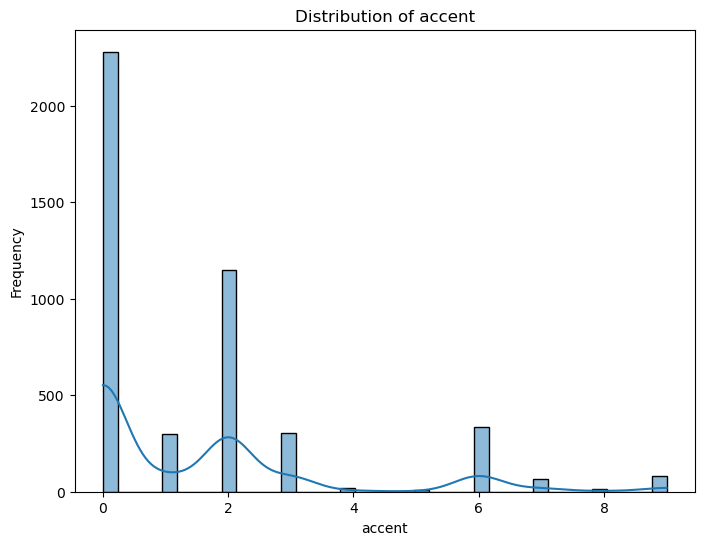

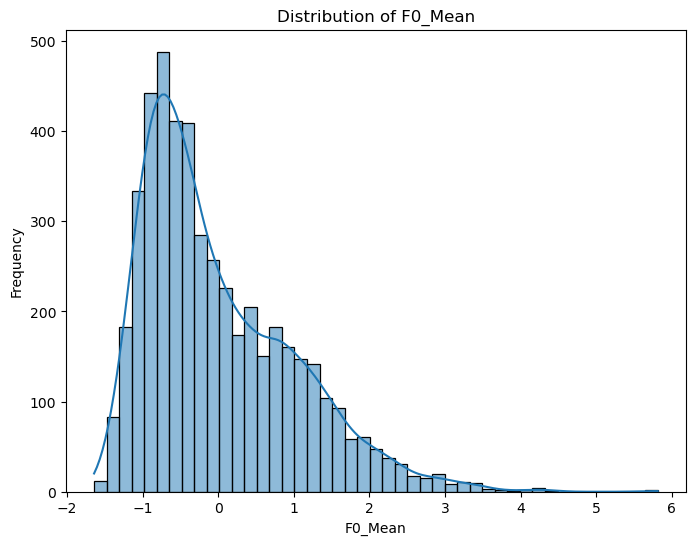

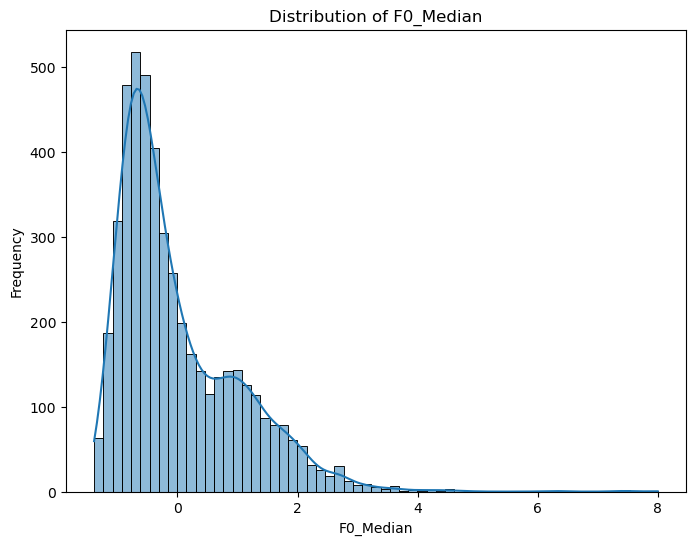

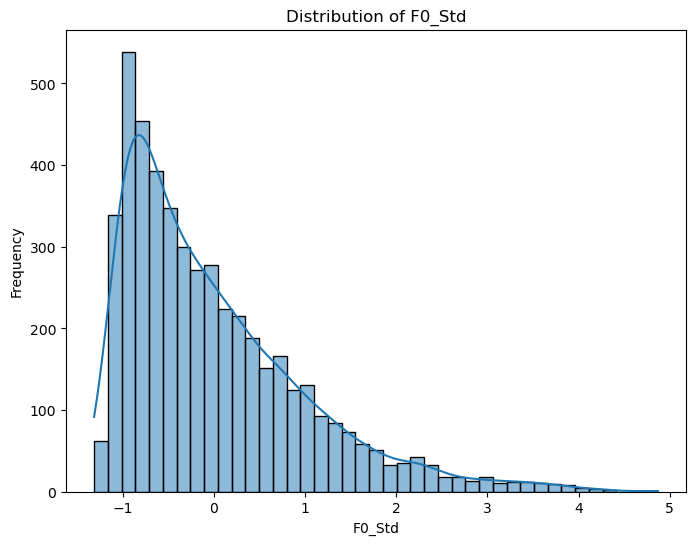

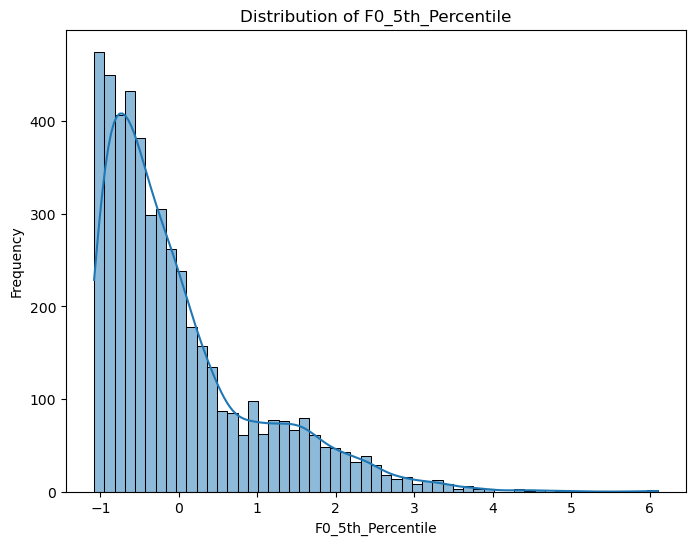

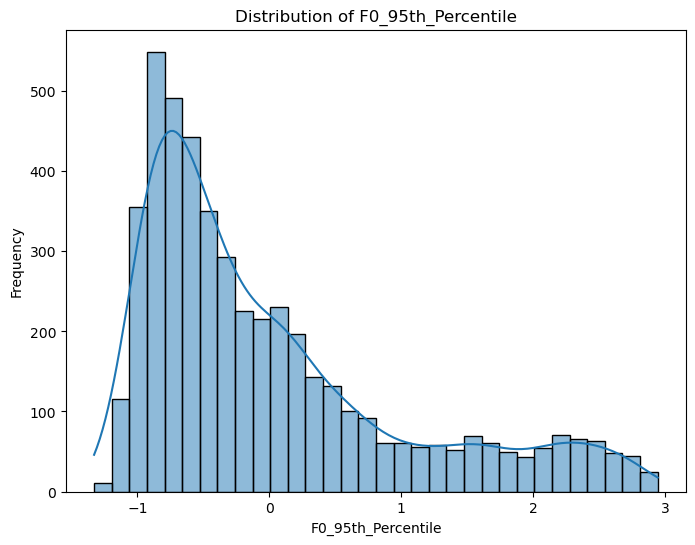

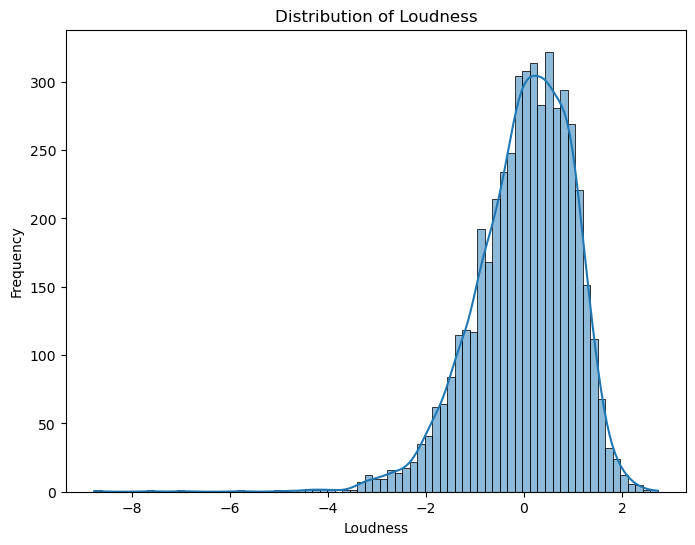

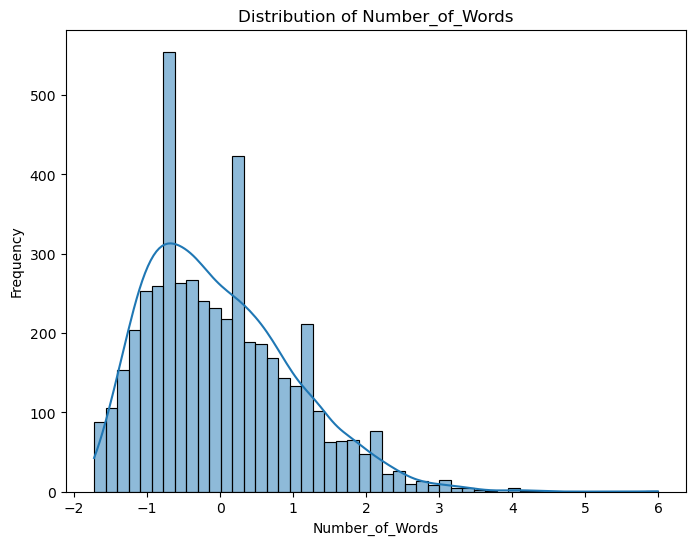

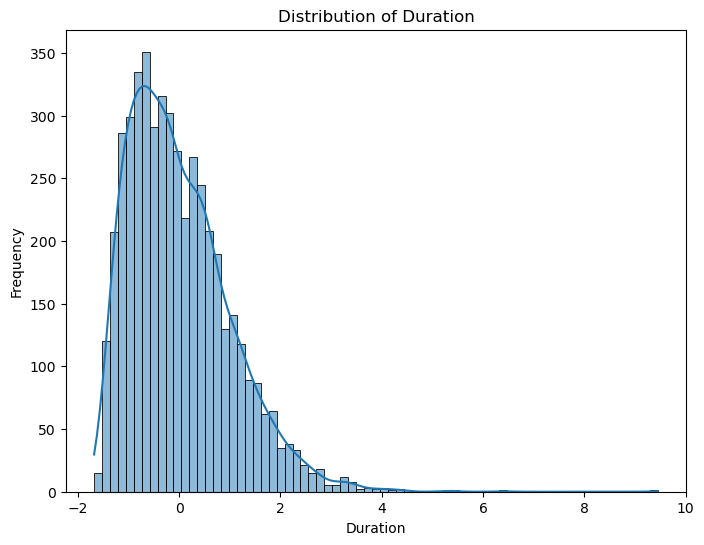

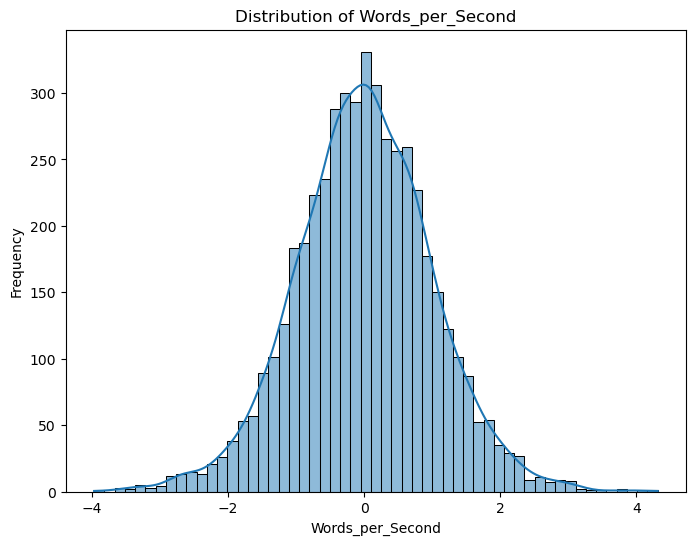

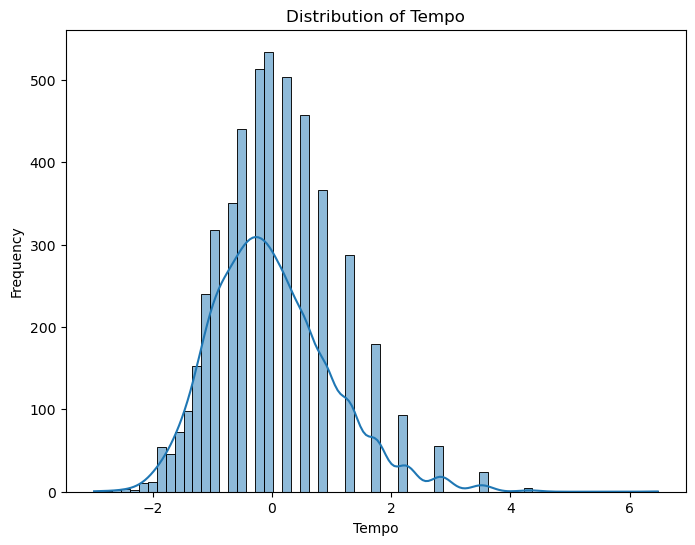

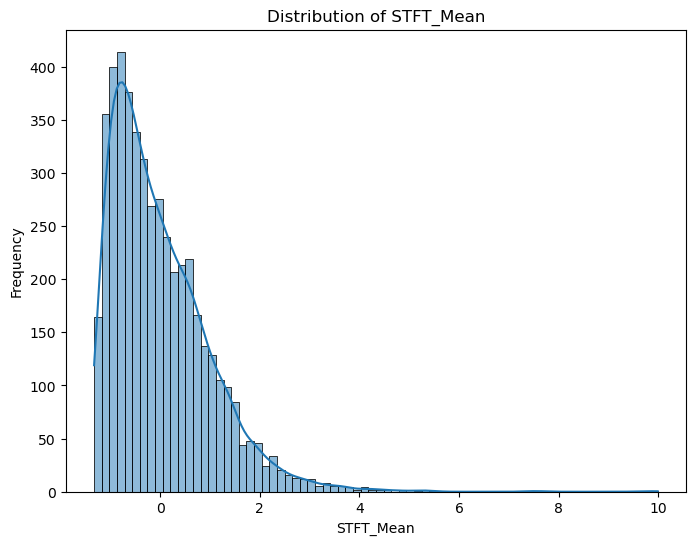

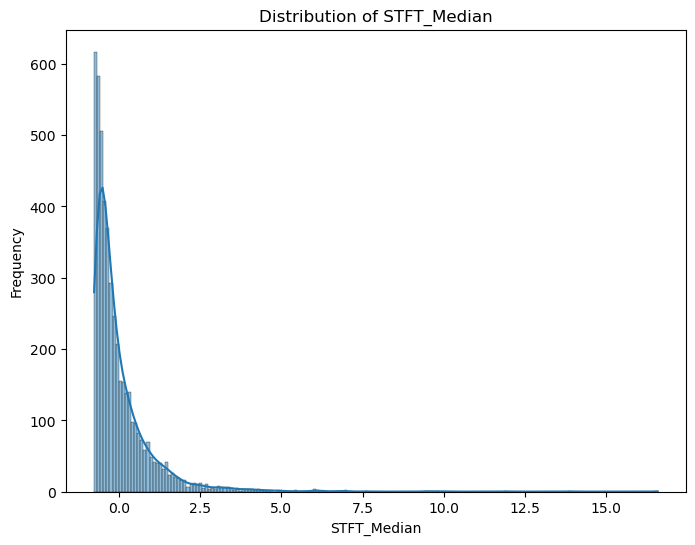

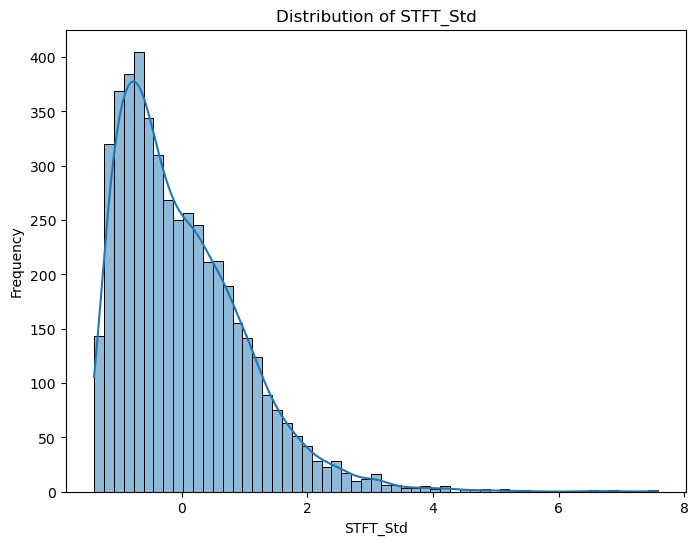

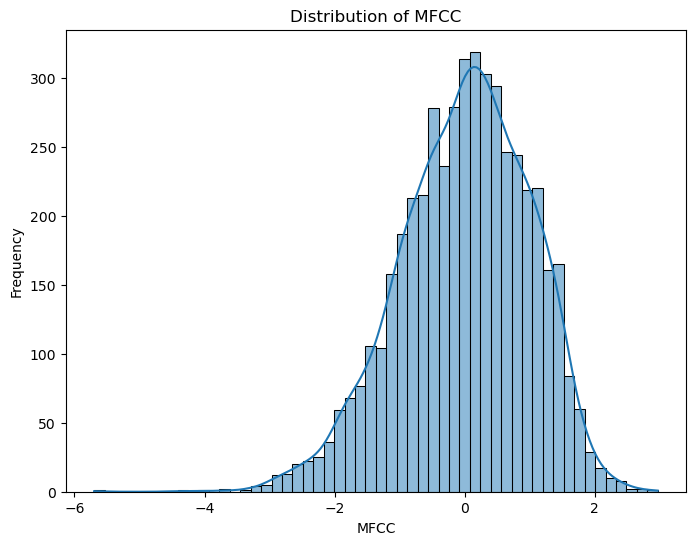

In [28]:
for i in range(len(features_to_display)):
    if i==0:
        continue
    plt.figure(figsize=(8, 6))
    sns.histplot(normalized_df[features_to_display[i]], kde=True)  # Use sns.histplot() for density plot
    plt.title(f'Distribution of {features_to_display[i]}')
    plt.xlabel(features_to_display[i])
    plt.ylabel('Frequency')
    plt.show()

### Features vs Target Scatter Plots after Normalization

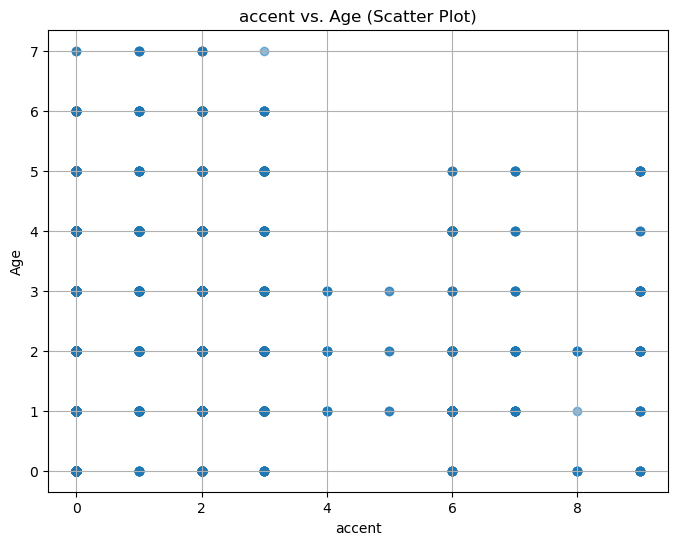

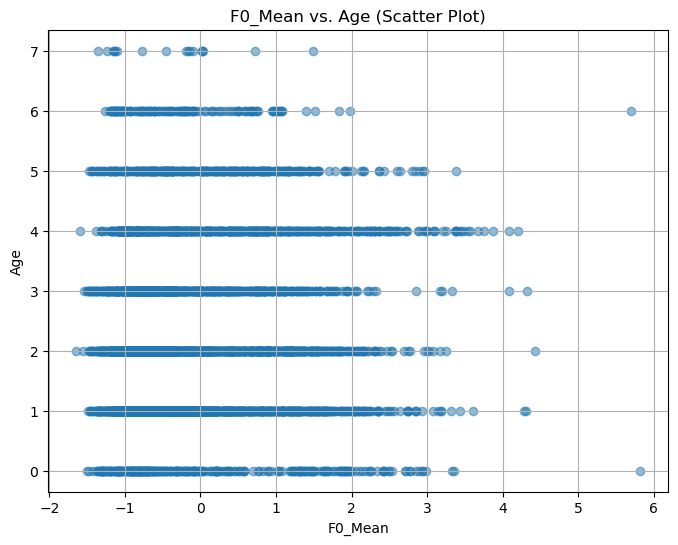

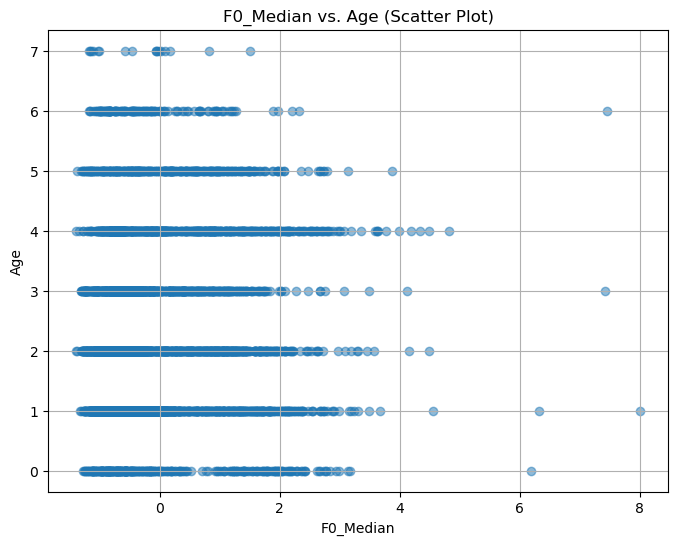

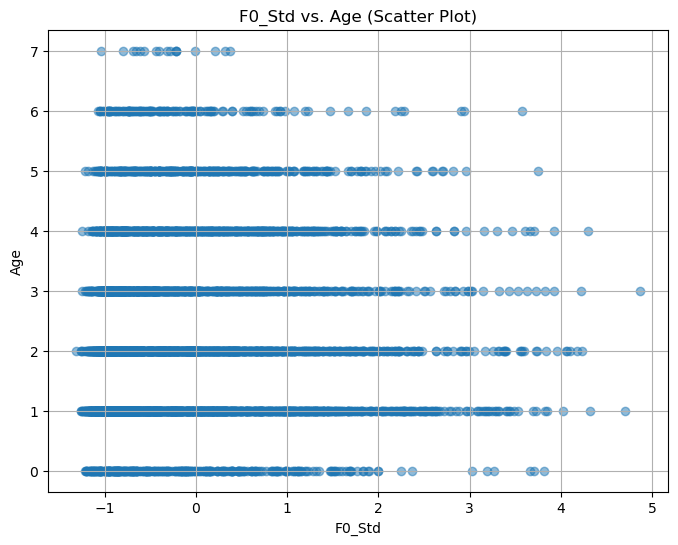

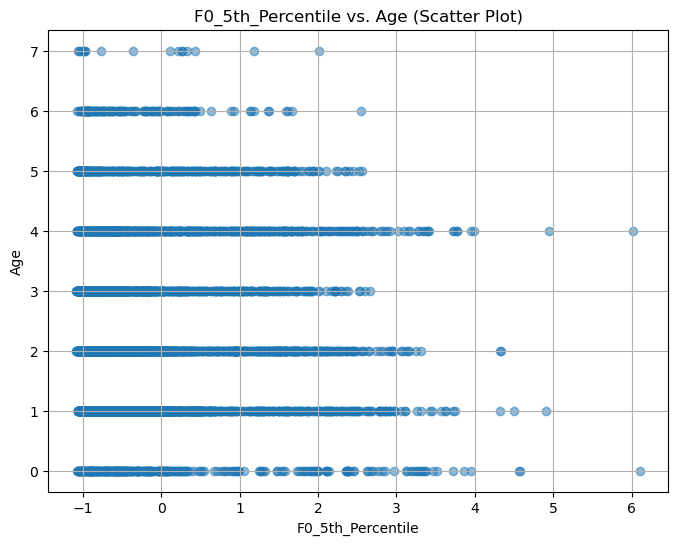

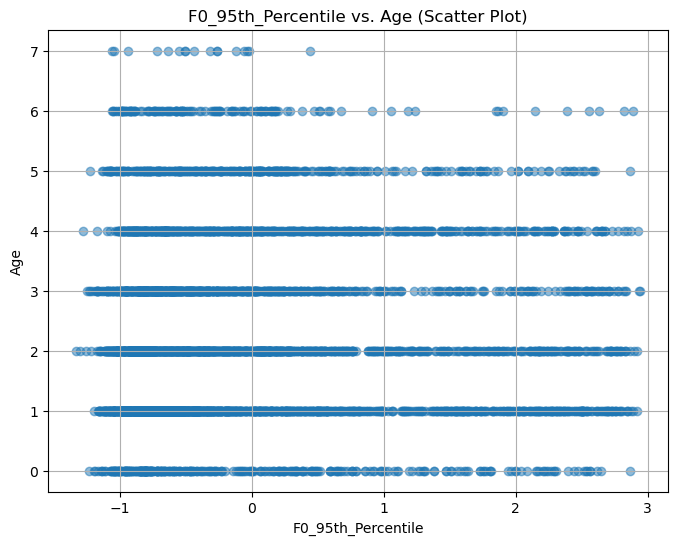

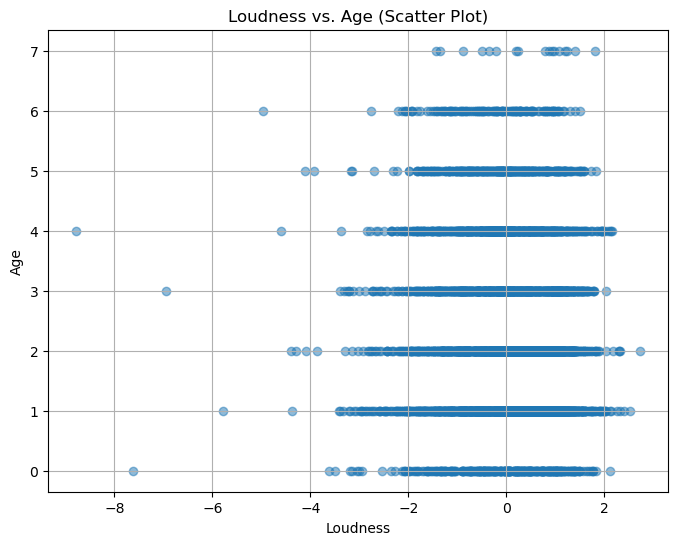

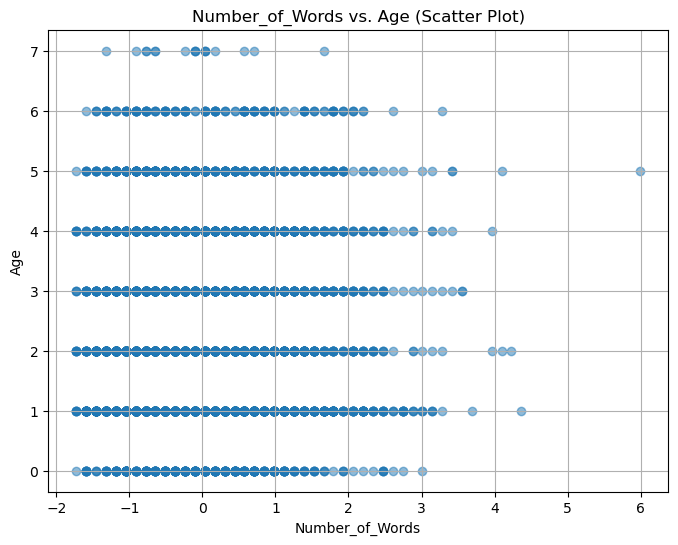

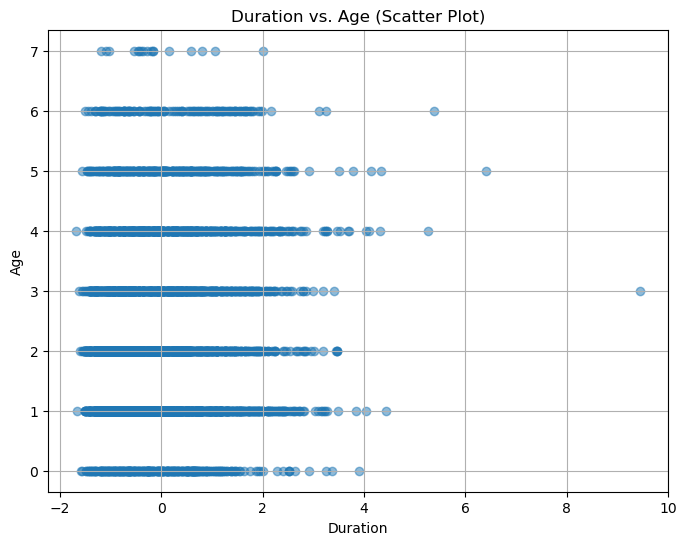

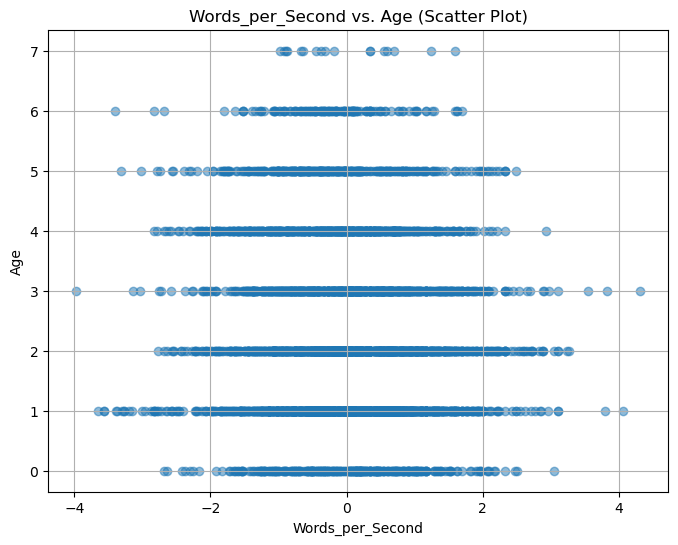

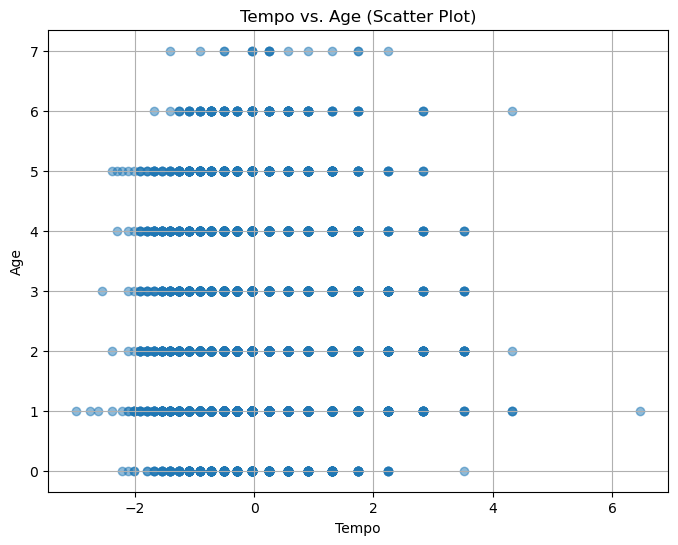

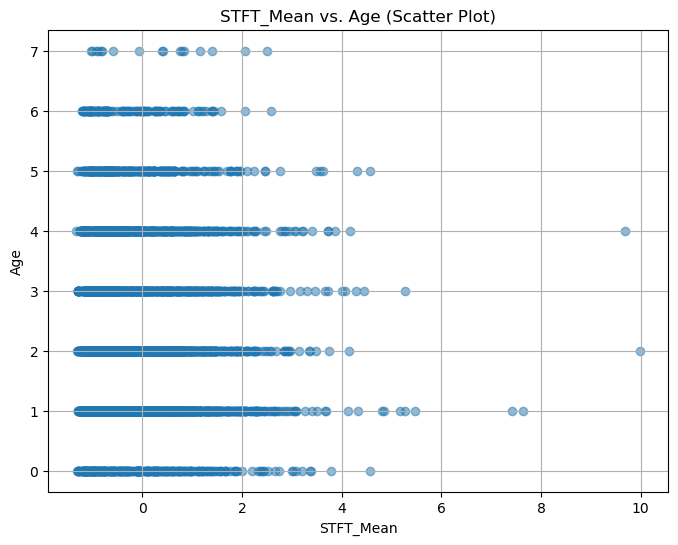

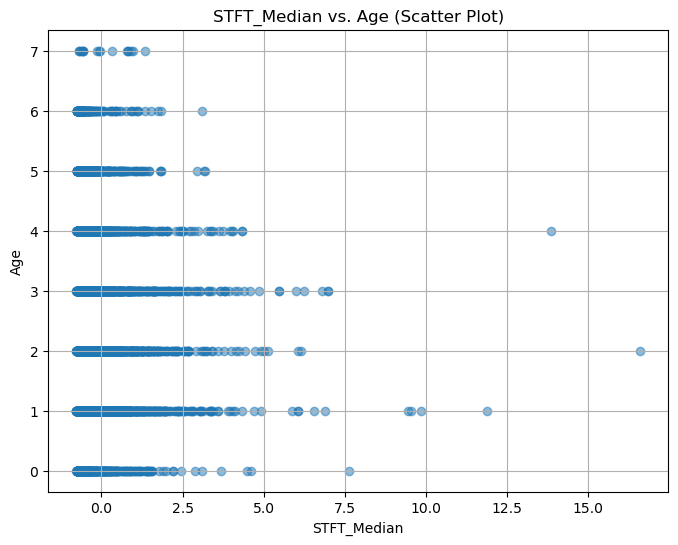

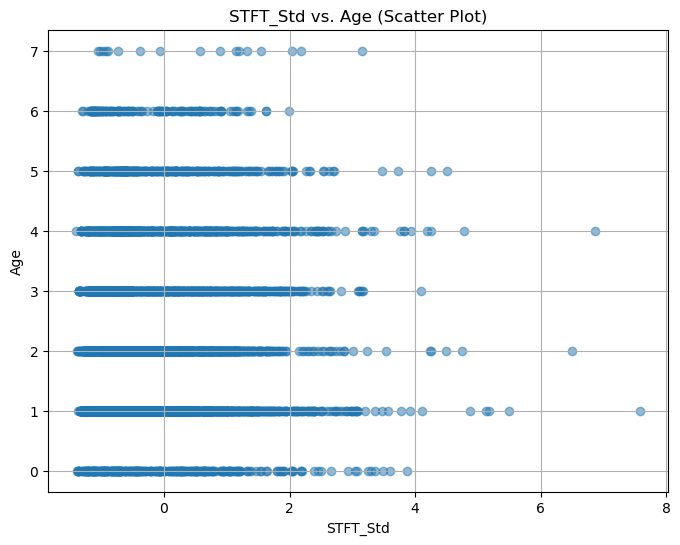

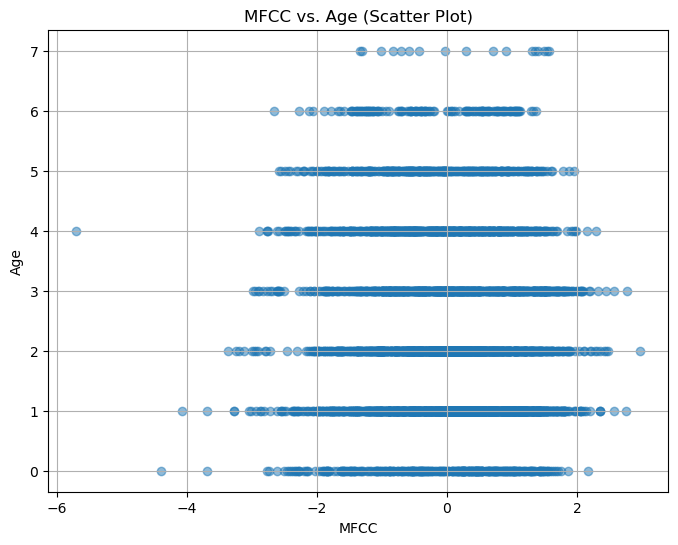

In [48]:
# Scatter plot
for i in range(len(features_to_display)):
    if i==0:
        continue
    plt.figure(figsize=(8, 6))
    plt.scatter(normalized_df[features_to_display[i]], normalized_df['age'], alpha=0.5)
    plt.title(f'{features_to_display[i]} vs. Age (Scatter Plot)')
    plt.xlabel(features_to_display[i])
    plt.ylabel('Age')
    plt.grid(True)
    plt.show()

## Preparing the test data

In [141]:
new_test_df.isnull().sum()

filename                 0
text                     0
up_votes                 0
down_votes               0
age                   2451
gender                2452
accent                2655
F0_Mean                  0
F0_Median                0
F0_Std                   0
F0_5th_Percentile        0
F0_95th_Percentile       0
Loudness                 0
Number_of_Words          0
Duration                 0
Words_per_Second         0
Tempo                    0
STFT_Mean                0
STFT_Median              0
STFT_Std                 0
MFCC                     0
dtype: int64

In [29]:
# Find rows with NaN values in the specified column
nan_rows = new_test_df[new_test_df['F0_Mean'].isna()]

# Get the indices of rows with NaN values in the specified column
nan_indices = nan_rows.index

In [30]:
print(f"The row indices are {nan_indices.values}")

The row indices are [1054 1094 1156]


In [31]:
new_test_df = new_test_df.drop(nan_indices)

In [32]:
new_test_df.isnull().sum()

filename                 0
text                     0
up_votes                 0
down_votes               0
age                   2451
gender                2452
accent                2655
F0_Mean                  0
F0_Median                0
F0_Std                   0
F0_5th_Percentile        0
F0_95th_Percentile       0
Loudness                 0
Number_of_Words          0
Duration                 0
Words_per_Second         0
Tempo                    0
STFT_Mean                0
STFT_Median              0
STFT_Std                 0
MFCC                     0
dtype: int64

## Identifying where gender and accent are NULL

In [33]:
null_indices = new_test_df[(new_test_df['gender'].isnull()) & (new_test_df['accent'].isnull())].index

In [34]:
predicting_data_set = new_test_df.loc[null_indices]

## Normalizing the predicting data set

In [35]:
standard_scaler = StandardScaler()
normalized_prediction_df = predicting_data_set.copy()
normalized_prediction_df[columns_to_normalize] = standard_scaler.fit_transform(predicting_data_set[columns_to_normalize])

In [36]:
normalized_prediction_df

filename  \
0     cv-valid-test/sample-000000.mp3   
2     cv-valid-test/sample-000002.mp3   
4     cv-valid-test/sample-000004.mp3   
10    cv-valid-test/sample-000010.mp3   
12    cv-valid-test/sample-000012.mp3   
...                               ...   
3990  cv-valid-test/sample-003990.mp3   
3991  cv-valid-test/sample-003991.mp3   
3992  cv-valid-test/sample-003992.mp3   
3993  cv-valid-test/sample-003993.mp3   
3994  cv-valid-test/sample-003994.mp3   

                                                   text  up_votes  down_votes  \
0            without the dataset the article is useless         1           0   
2                                       and you know it         1           0   
4     hold your nose to keep the smell from disablin...         2           0   
10    your son went to serve at a distant place and ...         5           1   
12    one can imagine these two covered with sand ru...         5           0   
...                                                 ...       ...         ...   
3990  the old man opened his cape and the boy was st...         1           0   
3991       in alchemy it's called the soul of the world         2           1   
3992  at that point in their lives everything is cle...         3           0   
3993                      he told them all to be seated         3           0   
3994                 the restaurant was quite expensive         2           0   

      age gender accent   F0_Mean  F0_Median    F0_Std  ...  \
0     NaN    NaN    NaN  0.134670  -0.659819  2.498910  ...   
2     NaN    NaN    NaN -1.178168  -0.804631 -1.076321  ...   
4     NaN    NaN    NaN -0.677725  -0.422812 -1.002944  ...   
10    NaN    NaN    NaN  0.747859   0.671526  0.436164  ...   
12    NaN    NaN    NaN -0.186815  -0.075007  0.316163  ...   
...   ...    ...    ...       ...        ...       ...  ...   
3990  NaN    NaN    NaN  0.029447  -0.002440 -0.516947  ...   
3991  NaN    NaN    NaN -0.897574  -0.697197 -1.018379  ...   
3992  NaN    NaN    NaN -0.806174  -0.720843  0.112790  ...   
3993  NaN    NaN    NaN -0.900081  -0.717100 -0.772005  ...   
3994  NaN    NaN    NaN  0.659223   0.920563 -0.420394  ...   

      F0_95th_Percentile  Loudness  Number_of_Words  Duration  \
0               2.858402  0.758868        -0.228460 -0.365448   
2              -1.083473 -1.763294        -1.419575 -0.750877   
4              -0.761431  1.205678         0.830309  0.602302   
10              0.642666  1.185873         0.565617  0.275175   
12             -0.579215  0.697347         1.359694  0.724975   
...                  ...       ...              ...       ...   
3990           -0.128107 -0.790921         1.359694  0.288806   
3991           -0.889636  0.470224        -0.360806 -0.678945   
3992           -0.816604  0.285379         0.565617  0.234284   
3993           -0.784610  1.063947        -0.890191 -0.992442   
3994            0.002777  0.312860        -0.890191 -0.460861   

      Words_per_Second     Tempo  STFT_Mean  STFT_Median  STFT_Std      MFCC  
0             0.278869  1.866016   0.404935     0.629048  0.326489  2.238862  
2            -1.875717  0.333832  -0.404219    -0.514113 -0.433515 -0.971935  
4            -0.039189  0.046547   1.593945     1.747463  1.214802  1.042469  
10            0.189677 -0.213377   1.431497     2.297162  1.269550  1.901398  
12            0.475404  0.333832   0.446734    -0.275366  0.543947  0.302001  
...                ...       ...        ...          ...       ...       ...  
3990          1.460568 -1.045134  -0.879899    -0.368321 -0.945693 -1.428174  
3991          1.119414  1.411149   0.119375    -0.437278  0.253419  0.641758  
3992          0.278869 -1.045134   0.057470     0.414570 -0.106751 -0.376734  
3993          0.959577  1.411149   0.777403     0.526195  0.982450  1.204317  
3994         -1.065553  0.653037  -0.283556    -0.322863 -0.324875  0.062839  

[2440 rows x 21 columns]

## Making the regression Model

## Multivariate regression Model

### Step 1
Initialization Of Parameters

In [37]:
def init_param(lenw: int):
    weight_vector = np.random.randn(1,lenw) # weight vector ez clap
    bias = 0
    return weight_vector,bias

### Step 2
Forward Propogation

In [38]:
def forw_propogation(X,w,b):
    z_vector = np.dot(w,X) + b # This is our linear function
    return z_vector

### Step 3
Cost Function

In [39]:
def cost_func(z_vector,y):
    m = y.shape[1]
    j = (1/(2*m)) * np.sum(np.square(z_vector-y))
    return j

### Step 4
Back Propogation

In [40]:
def back_pop(X,y,z_vector):
    m = y.shape[1]
    dz = (1/m) * (z_vector - y)
    dw = np.dot(dz,X.T) # Dz multiplied by Transpose of design matrix X
    db = np.sum(dz)
    return dw,db

### Step 5
Gradient Descent Update

In [41]:
def gradient_desc(w,b,dw,db,learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w,b

### Step 6
Defining our Linear Regression Model

In [150]:
def linear_regression_scratch(X_train,y_train,X_val,y_val,learning_rate,epochs):
    costs_train = []
    lenw = X_train.shape[0] # Number of rows i.e samples
    # Step 1
    w,b = init_param(lenw)
    m_train = y_train.shape[1]
    m_val = y_val.shape[1]
    for i in range(epochs):
        # Step 2
        z_train = forw_propogation(X_train,w,b)

        # Step 3
        cost_train = cost_func(z_train,y_train)

        # Step 4
        dw,db = back_pop(X_train,y_train,z_train)
        
        # Step 5
        w,b = gradient_desc(w,b,dw,db,learning_rate)


        # Mean Absolute Error
        # MAE_train = (1/m_train) * np.sum(np.abs(z_train-y_train))
        # Mean squared error
        mse_train = (1/m_train) * np.sum((z_train - y_train)**2)
        
        # Repeat the above steps for Validation Set
        
        # Step 2
        z_val = forw_propogation(X_val,w,b)

        # Step 3
        cost_val = cost_func(z_val,y_val)
        
        # Mean Absolute Error for validation set
        # MAE_val = (1/m_val) * np.sum(np.abs(z_val-y_val))
        mse_val = (1/m_val) * np.sum((z_val-y_val)**2)

        if i%50 == 0:
            costs_train.append(cost_train)
            
        # Printing to see whats happening hehe
        print(f"Iteration No. {i+1}")
        print(f"Training Cost : {cost_train}")
        print(f"Validation Cost : {cost_val}")
        print(f"Training Mean Squared Error (MSE) : {mse_train}")
        print(f"Validation Mean Squared Error (MSE) : {mse_val}")
    # print("Z Train : ")
    # print(z_train)
    plt.plot(costs_train)
    plt.xlabel('Iterations per 10')
    plt.ylabel('Training Cost')
    plt.title(f"Learning Rate : {learning_rate}")
    return w,b

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = normalized_df.iloc[:, 7:]
y = normalized_df['age']

In [45]:
X

F0_Mean  F0_Median    F0_Std  F0_5th_Percentile  F0_95th_Percentile  \
5      0.917629   1.061273 -0.707529           1.730676            0.097084   
8      0.496630  -0.296573  2.285445          -0.906094            2.630349   
13     0.994944   1.121984 -0.609479           1.978447            0.119366   
14     0.461916   0.375973 -0.059732           0.525865            0.063141   
19    -0.078919  -0.836219  2.414163          -0.945365            2.674367   
...         ...        ...       ...                ...                 ...   
14993 -0.319263  -0.089762 -0.676903          -0.126900           -0.529775   
14994  0.080903   0.259150 -0.000775          -0.913207           -0.212534   
14995 -0.815392  -0.811321  0.158654          -0.932348           -0.662438   
14998 -0.810252  -0.888520  0.607241          -1.043617           -0.652036   
15000 -0.416926  -0.816447  1.632039          -0.417048            1.879272   

       Loudness  Number_of_Words  Duration  Words_per_Second     Tempo  \
5     -1.740979         0.711101  0.905097         -0.513650 -1.091528   
8     -0.910580        -1.048556 -1.026381          0.019193  0.562231   
13     0.183638        -0.236407  0.283095         -1.137466 -0.028397   
14     0.244051         1.252534  0.708675          0.618426  0.562231   
19     0.315059        -0.101048  0.414043         -1.090574  1.743487   
...         ...              ...       ...               ...       ...   
14993 -1.109246         0.440385  1.625309         -1.637643  1.300516   
14994 -0.555251         1.793967  1.805362         -0.288587 -0.914339   
14995  0.925654        -0.371765 -0.486222          0.243062 -0.721743   
14998  0.694618        -0.371765  0.446780         -1.600129  1.743487   
15000  0.988426        -0.236407 -0.175222         -0.269972 -0.511638   

       STFT_Mean  STFT_Median  STFT_Std      MFCC  
5      -1.174422    -0.740056 -1.189845 -2.044115  
8      -0.898021    -0.570705 -0.990863 -1.069552  
13     -0.253398    -0.420030 -0.365343 -0.986258  
14     -0.674732    -0.583689 -0.469835 -0.326365  
19     -0.272641     0.272195 -0.407768  1.967327  
...          ...          ...       ...       ...  
14993  -0.965632    -0.496751 -0.943584 -0.224276  
14994  -0.680521    -0.141378 -0.782604 -1.184724  
14995   1.013573    -0.300332  0.723388  0.795552  
14998   0.779084     0.373003  0.664041  1.476987  
15000   0.812599     0.201954  0.936169  0.899622  

[4821 rows x 14 columns]

In [46]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=5)

In [47]:
X_train.shape

(3856, 14)

In [48]:
X_train = X_train.T

In [49]:
X_train.shape

(14, 3856)

In [50]:
y_train.shape

(3856,)

In [51]:
y_train = np.array([y_train])

In [52]:
y_train.shape

(1, 3856)

In [53]:
X_val = X_val.T

In [54]:
X_val.shape

(14, 965)

In [55]:
y_val = np.array([y_val])
y_val.shape

(1, 965)

Iteration No. 1
Training Cost : 6.7167357358767825
Validation Cost : 4.451753661304374
Training Mean Squared Error (MSE) : 13.433471471753565
Validation Mean Squared Error (MSE) : 8.903507322608748
Iteration No. 2
Training Cost : 3.9109801204662813
Validation Cost : 3.0043518224742454
Training Mean Squared Error (MSE) : 7.821960240932563
Validation Mean Squared Error (MSE) : 6.008703644948491
Iteration No. 3
Training Cost : 2.689839376376846
Validation Cost : 2.332308108359074
Training Mean Squared Error (MSE) : 5.379678752753692
Validation Mean Squared Error (MSE) : 4.664616216718148
Iteration No. 4
Training Cost : 2.0967324356011465
Validation Cost : 1.9446455822965105
Training Mean Squared Error (MSE) : 4.193464871202293
Validation Mean Squared Error (MSE) : 3.889291164593021
Iteration No. 5
Training Cost : 1.7778165394277257
Validation Cost : 1.7226534342099418
Training Mean Squared Error (MSE) : 3.5556330788554513
Validation Mean Squared Error (MSE) : 3.4453068684198835
Iteration 

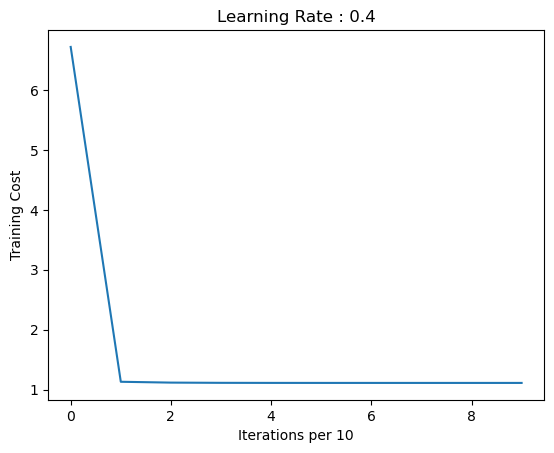

In [56]:
linear_regression_scratch(X_train,y_train,X_val,y_val,0.4,500)

## Comparing with Scikit learn

In [57]:
X_val.T

F0_Mean  F0_Median    F0_Std  F0_5th_Percentile  F0_95th_Percentile  \
10205  2.026429   2.141025  0.323441           2.449072            1.165973   
8049   1.118467   1.051387 -0.433116           2.131847            0.177810   
1153   2.423296   2.667414  0.399546           2.562843            1.216499   
10449 -0.770042  -0.599465 -0.758565          -0.576453           -0.632612   
4326  -0.652348  -0.505562 -0.825791          -0.224834           -0.637887   
...         ...        ...       ...                ...                 ...   
8040  -0.827946  -0.517214 -0.930393          -0.652634           -0.855100   
3880  -0.291974  -0.768702  1.903657          -0.689044            2.684865   
14400  2.384017   1.939530  0.203506           2.826044            0.883487   
7732  -0.193203   0.027479 -1.052150           0.586350           -0.654439   
4170  -1.021488  -0.976547 -0.621465          -0.968268           -0.623846   

       Loudness  Number_of_Words  Duration  Words_per_Second     Tempo  \
10205 -1.731081         1.658609  2.247310         -0.870545 -0.511638   
8049   2.188438        -0.507123  0.517017         -1.908665  1.743487   
1153   1.028159         4.095058  4.146051         -0.362258 -1.255086   
10449 -0.414629        -0.101048  0.430411         -1.114177 -0.511638   
4326   0.300943         1.929326  0.594096          1.939683 -1.547155   
...         ...              ...       ...               ...       ...   
8040   1.726337        -1.048556 -1.173698          0.835658 -0.914339   
3880  -0.483756        -0.371765 -0.502591          0.295785 -0.028397   
14400 -1.216952        -1.319273 -0.829960         -1.715795 -1.678083   
7732   0.169667        -1.183915 -0.666275         -1.645267 -1.547155   
4170  -0.027558        -1.048556 -1.010013         -0.056654 -0.511638   

       STFT_Mean  STFT_Median  STFT_Std      MFCC  
10205  -1.166418    -0.752651 -1.016834 -2.149402  
8049    3.350497     0.147124  4.743932  0.962091  
1153    1.879658     1.465238  1.787442 -0.040942  
10449  -0.783819    -0.127394 -0.868406 -0.127040  
4326    0.179523     0.510464 -0.115976  0.265759  
...          ...          ...       ...       ...  
8040    5.263876     9.458562  2.401694  1.961646  
3880   -0.595373    -0.665632 -0.616716  0.083327  
14400  -0.403138    -0.639261  0.099554 -1.128169  
7732    0.576147    -0.106492  0.518764  0.780348  
4170   -0.470935     0.053875 -0.710316 -0.517106  

[965 rows x 14 columns]

In [58]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [59]:
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train.T,y_train.T)
predictions = linear_regression.predict(X_val.T)

In [60]:
predictions.shape

(965, 1)

In [61]:
mae = (1/y_val.shape[1]) * np.sum(np.abs(predictions-y_val.T))
mae

1.2637001610294123

In [62]:
mse = mean_squared_error(y_val.T, predictions)
mse

2.426512437911507

## Changing our dataset to fill nan values with mode instead of droppping them

In [63]:
mode_for_age = new_df['age'].mode()[0]

In [64]:
new_df_with_mode = new_df.copy()

In [65]:
new_df_with_mode['age'].fillna(mode_for_age,inplace = True)

## Mapping cateogrical data to numerical data

In [66]:
# Define a mapping dictionary for age categories
age_mapping = {
    'teens': 0,
    'twenties': 1,
    'thirties': 2,
    'fourties': 3,
    'fifties': 4,
    'sixties': 5,
    'seventies': 6,
    'eighties': 7,
    'nineties': 8
}
new_df_with_mode['age'] = new_df_with_mode['age'].map(age_mapping)

## Normalization

In [67]:
normalized_mode_df = new_df_with_mode.copy()

In [68]:
normalized_mode_df[columns_to_normalize] = standard_scaler.fit_transform(new_df_with_mode[columns_to_normalize])

In [69]:
normalized_mode_df

filename  \
0      cv-valid-train/sample-000000.mp3   
1      cv-valid-train/sample-000001.mp3   
2      cv-valid-train/sample-000002.mp3   
3      cv-valid-train/sample-000003.mp3   
4      cv-valid-train/sample-000004.mp3   
...                                 ...   
14996  cv-valid-train/sample-014996.mp3   
14997  cv-valid-train/sample-014997.mp3   
14998  cv-valid-train/sample-014998.mp3   
14999  cv-valid-train/sample-014999.mp3   
15000  cv-valid-train/sample-015000.mp3   

                                                    text  up_votes  \
0      learn to recognize omens and follow them the o...         1   
1             everything in the universe evolved he said         1   
2      you came so that you could learn about your dr...         1   
3      so now i fear nothing because it was those ome...         1   
4      if you start your emails with greetings let me...         3   
...                                                  ...       ...   
14996                  we speak of them only to children         4   
14997  its been a long time since she last read chekh...         1   
14998  for at that time it had not occurred to him th...         1   
14999  yeah better if people are already familiar wit...         1   
15000     there was enough there to buy a lot of weapons         6   

       down_votes  age gender      accent   F0_Mean  F0_Median    F0_Std  ...  \
0               0    1    NaN         NaN -0.929270  -0.854524 -0.482922  ...   
1               0    1    NaN         NaN -0.327197  -0.308924  0.644872  ...   
2               0    1    NaN         NaN -0.051436  -0.127221  0.608789  ...   
3               0    1    NaN         NaN  1.464926   1.546120 -0.123321  ...   
4               2    1    NaN         NaN  1.294817   1.473371 -0.625843  ...   
...           ...  ...    ...         ...       ...        ...       ...  ...   
14996           0    1    NaN         NaN -0.085388   0.225327 -0.573984  ...   
14997           0    1    NaN         NaN -0.558187  -0.870413  1.096537  ...   
14998           0    3   male  newzealand -0.837379  -0.912619  0.623024  ...   
14999           0    1    NaN         NaN -0.936190  -0.730840 -0.768679  ...   
15000           0    1   male          us -0.439750  -0.840383  1.662168  ...   

       F0_95th_Percentile  Loudness  Number_of_Words  Duration  \
0               -0.829583  0.635557         0.903433  0.278027   
1               -0.639376 -3.318375        -0.300987  0.495306   
2               -0.556309  0.037442         0.501960  0.828468   
3                0.184820 -1.562330         0.769609  1.045747   
4                0.129463  2.531399         1.438731  0.451851   
...                   ...       ...              ...       ...   
14996           -0.396947  0.684432        -0.568636 -0.692486   
14997            1.422067 -0.321121         3.713746  3.696551   
14998           -0.660358  0.690330        -0.434811  0.278027   
14999           -0.760106  0.487939         0.769609  1.654128   
15000            1.911508  0.953970        -0.300987 -0.272413   

       Words_per_Second     Tempo  STFT_Mean  STFT_Median  STFT_Std      MFCC  
0              0.805022  2.302083   0.558710     0.380939  0.142484  0.650752  
1             -1.544147  0.282365  -1.147920    -0.587737 -1.253590 -2.492909  
2             -0.805470 -0.256226  -0.128752     0.271373 -0.328370  0.317639  
3             -0.737161 -1.240192  -1.048315    -0.534088 -1.082766 -1.571110  
4              1.262383 -1.240192   7.395649    10.716848  7.153247  2.122329  
...                 ...       ...        ...          ...       ...       ...  
14996          0.504707 -1.535381  -0.204772    -0.238089  0.183433  0.499120  
14997         -0.544546 -0.488800  -0.584231    -0.108201 -0.505595  0.577004  
14998         -1.481779  1.790421   0.715318     0.311035  0.618111  1.502114  
14999         -1.374440 -0.256226   0.588169     0.099653  0.837753  0.666762  
15000         -0.166868 -0.

## Running Regression Model for Median

In [70]:
X = normalized_mode_df.iloc[:, 7:]
y = normalized_mode_df['age']

In [71]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=5)

In [72]:
X_train = X_train.T

In [73]:
y_train = np.array([y_train])

In [74]:
X_val = X_val.T

In [75]:
y_val = np.array([y_val])

Iteration No. 1
Training Cost : 24.929510219128996
Validation Cost : 3.6519864485165536
Training Mean Squared Error (MSE) : 49.85902043825799
Validation Mean Squared Error (MSE) : 7.303972897033107
Iteration No. 2
Training Cost : 3.5938487293618424
Validation Cost : 1.3999416468757644
Training Mean Squared Error (MSE) : 7.187697458723685
Validation Mean Squared Error (MSE) : 2.799883293751529
Iteration No. 3
Training Cost : 1.4309510358959432
Validation Cost : 0.9766568864795375
Training Mean Squared Error (MSE) : 2.8619020717918864
Validation Mean Squared Error (MSE) : 1.953313772959075
Iteration No. 4
Training Cost : 0.995667835623477
Validation Cost : 0.8137057449010963
Training Mean Squared Error (MSE) : 1.991335671246954
Validation Mean Squared Error (MSE) : 1.6274114898021925
Iteration No. 5
Training Cost : 0.838285833190795
Validation Cost : 0.7411152736834181
Training Mean Squared Error (MSE) : 1.67657166638159
Validation Mean Squared Error (MSE) : 1.4822305473668362
Iteration 

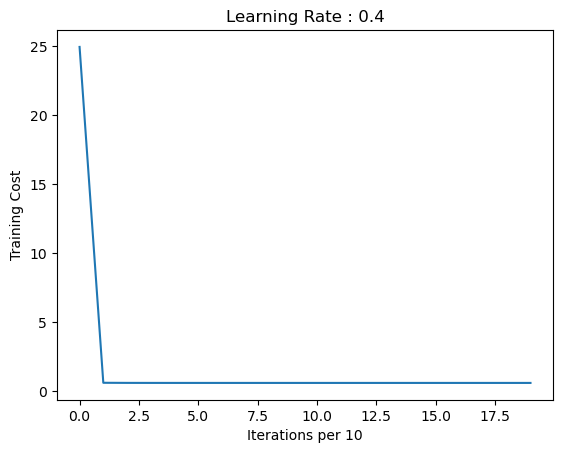

In [76]:
linear_regression_scratch(X_train,y_train,X_val,y_val,0.4,1000)

## Comparing with scikit learn

In [79]:
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train.T,y_train.T)
predictions = linear_regression.predict(X_val.T)

In [80]:
mse = mean_squared_error(y_val.T, predictions)
mse

1.1817828272639408

## Mean

In [81]:
new_df_with_mean = new_df.copy()

## Mapping cateogrical data to numerical data¶

In [82]:
# Define a mapping dictionary for age categories
age_mapping = {
    'teens': 0,
    'twenties': 1,
    'thirties': 2,
    'fourties': 3,
    'fifties': 4,
    'sixties': 5,
    'seventies': 6,
    'eighties': 7,
    'nineties': 8
}
new_df_with_mean['age'] = new_df_with_mean['age'].map(age_mapping)

### Changing the dataset to fill nan values with mean

In [83]:
mean_for_age = new_df_with_mean['age'].mean()
mean_for_age =round(mean_for_age)
mean_for_age

2

In [84]:
new_df_with_mean['age'].fillna(mean_for_age,inplace = True)

## Normalization 

In [85]:
new_df_with_mean[columns_to_normalize] = standard_scaler.fit_transform(new_df_with_mean[columns_to_normalize])

## Running Regression Model 

In [86]:
X = new_df_with_mean.iloc[:, 7:]
y = new_df_with_mean['age']

In [87]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=5)

In [88]:
X_train = X_train.T
y_train = np.array([y_train])
X_val = X_val.T
y_val = np.array([y_val])

Iteration No. 1
Training Cost : 5.378664020329754
Validation Cost : 1.9504372072958736
Training Mean Squared Error (MSE) : 10.757328040659509
Validation Mean Squared Error (MSE) : 3.900874414591747
Iteration No. 2
Training Cost : 2.000801292788063
Validation Cost : 1.178993045700882
Training Mean Squared Error (MSE) : 4.001602585576126
Validation Mean Squared Error (MSE) : 2.357986091401764
Iteration No. 3
Training Cost : 1.1925485195250098
Validation Cost : 0.8752968077627566
Training Mean Squared Error (MSE) : 2.3850970390500197
Validation Mean Squared Error (MSE) : 1.7505936155255133
Iteration No. 4
Training Cost : 0.9019978060038302
Validation Cost : 0.7494559254894317
Training Mean Squared Error (MSE) : 1.8039956120076603
Validation Mean Squared Error (MSE) : 1.4989118509788635
Iteration No. 5
Training Cost : 0.7715191110609257
Validation Cost : 0.6777119930865614
Training Mean Squared Error (MSE) : 1.5430382221218515
Validation Mean Squared Error (MSE) : 1.3554239861731228
Iterat

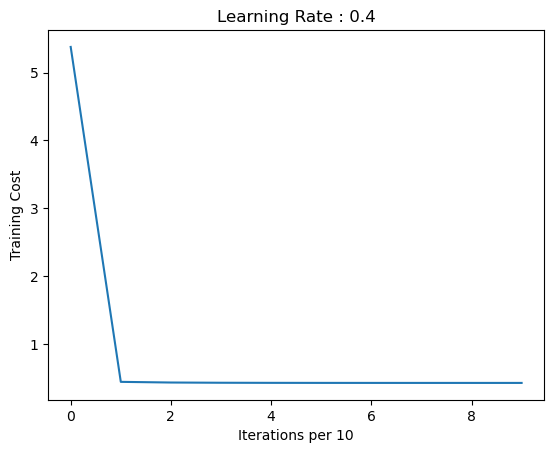

In [90]:
linear_regression_scratch(X_train,y_train,X_val,y_val,0.4,500)

## Comparing with scikit learn

In [91]:
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(X_train.T,y_train.T)
predictions = linear_regression.predict(X_val.T)

In [92]:
mse = mean_squared_error(y_val.T, predictions)
mse

0.8305517474176064

## Now i will try predicting the nan values

In [189]:
# Define a mapping dictionary for accent categories
accent_mapping = {
    'us': 0,
    'australia': 1,
    'england': 2,
    'canada': 3,
    'philippines': 4,
    'hongkong': 5,
    'indian': 6,
    'ireland': 7,
    'malaysia': 8,
    'newzealand': 9
}
new_df_predicting_nan_values['accent'] = new_df_predicting_nan_values['accent'].map(accent_mapping)

In [190]:
new_df_predicting_nan_values_for_training = new_df_predicting_nan_values.copy()
new_df_predicting_nan_values_for_training.dropna(inplace=True)

In [191]:
new_df_predicting_nan_values_for_training[columns_to_normalize] = standard_scaler.fit_transform(new_df_predicting_nan_values_for_training[columns_to_normalize])

In [192]:
X = new_df_predicting_nan_values_for_training.iloc[:, 7:]
y = new_df_predicting_nan_values_for_training['accent']

In [193]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=5)

In [194]:
X_train = X_train.T
y_train = np.array([y_train])
X_val = X_val.T
y_val = np.array([y_val])

Iteration No. 1
Training Cost : 15.790608814477277
Validation Cost : 4.379161294108277
Training Mean Squared Error (MSE) : 31.581217628954555
Validation Mean Squared Error (MSE) : 8.758322588216554
Iteration No. 2
Training Cost : 4.33008247291418
Validation Cost : 2.9404801162305905
Training Mean Squared Error (MSE) : 8.66016494582836
Validation Mean Squared Error (MSE) : 5.880960232461181
Iteration No. 3
Training Cost : 2.8835753735600402
Validation Cost : 2.6180708974299924
Training Mean Squared Error (MSE) : 5.7671507471200805
Validation Mean Squared Error (MSE) : 5.236141794859985
Iteration No. 4
Training Cost : 2.5498605591145784
Validation Cost : 2.4971489006856897
Training Mean Squared Error (MSE) : 5.099721118229157
Validation Mean Squared Error (MSE) : 4.9942978013713795
Iteration No. 5
Training Cost : 2.419001098872201
Validation Cost : 2.42535149291327
Training Mean Squared Error (MSE) : 4.838002197744402
Validation Mean Squared Error (MSE) : 4.85070298582654
Iteration No. 6

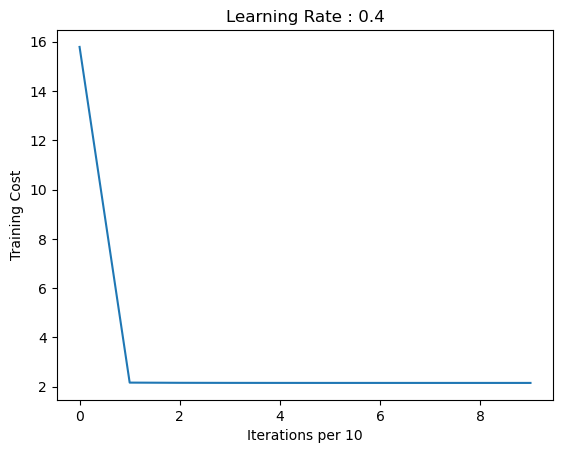

In [195]:
w,b = linear_regression_scratch(X_train,y_train,X_val,y_val,0.4,500)

In [205]:
column_name = 'accent'

# Step 1: Identify rows with null values in the specified column
accent_null = new_df_predicting_nan_values[new_df_predicting_nan_values[column_name].isnull()]

In [206]:
standard_scaler = StandardScaler()
accent_null_temp = accent_null.copy()
accent_null_temp[columns_to_normalize] = standard_scaler.fit_transform(accent_null[columns_to_normalize])

In [207]:
x_test = accent_null_temp.iloc[:, 7:]

In [210]:
predictions = forw_propogation(x_test.T, w, b)

In [214]:
rounded_predictions = np.round(predictions)

In [217]:
len(rounded_predictions[0])

10328

In [219]:
len(new_df_predicting_nan_values[new_df_predicting_nan_values['accent'].isnull()])

10328

In [222]:
new_df_predicting_nan_values.loc[new_df_predicting_nan_values['accent'].isnull(), 'accent'] = rounded_predictions[0]

In [223]:
new_df_predicting_nan_values

filename  \
0      cv-valid-train/sample-000000.mp3   
1      cv-valid-train/sample-000001.mp3   
2      cv-valid-train/sample-000002.mp3   
3      cv-valid-train/sample-000003.mp3   
4      cv-valid-train/sample-000004.mp3   
...                                 ...   
14996  cv-valid-train/sample-014996.mp3   
14997  cv-valid-train/sample-014997.mp3   
14998  cv-valid-train/sample-014998.mp3   
14999  cv-valid-train/sample-014999.mp3   
15000  cv-valid-train/sample-015000.mp3   

                                                    text  up_votes  \
0      learn to recognize omens and follow them the o...         1   
1             everything in the universe evolved he said         1   
2      you came so that you could learn about your dr...         1   
3      so now i fear nothing because it was those ome...         1   
4      if you start your emails with greetings let me...         3   
...                                                  ...       ...   
14996                  we speak of them only to children         4   
14997  its been a long time since she last read chekh...         1   
14998  for at that time it had not occurred to him th...         1   
14999  yeah better if people are already familiar wit...         1   
15000     there was enough there to buy a lot of weapons         6   

       down_votes       age gender  accent     F0_Mean   F0_Median  \
0               0       NaN    NaN     1.0  112.909521  104.384917   
1               0       NaN    NaN     2.0  140.584319  130.095506   
2               0       NaN    NaN     2.0  153.259853  138.658002   
3               0       NaN    NaN     2.0  222.960682  217.511666   
4               2       NaN    NaN     3.0  215.141465  214.083491   
...           ...       ...    ...     ...         ...         ...   
14996           0       NaN    NaN     1.0  151.699242  155.271275   
14997           0       NaN    NaN     2.0  129.966639  103.636161   
14998           0  fourties   male     9.0  117.133389  101.647269   
14999           0       NaN    NaN     2.0  112.591446  110.213349   
15000           0  twenties   male     0.0  135.410700  105.051304   

           F0_Std  ...  F0_95th_Percentile   Loudness  Number_of_Words  \
0       32.189246  ...          143.489029  67.864264               23   
1       72.779049  ...          165.985373  29.539421               14   
2       71.480377  ...          175.809941  62.066831               20   
3       45.131419  ...          263.465424  46.560491               22   
4       27.045431  ...          256.918162  86.240361               27   
...           ...  ...                 ...        ...              ...   
14996   28.911890  ...          194.658136  68.337998               12   
14997   89.034636  ...          409.798259  58.591332               44   
14998   71.992703  ...          163.503703  68.395173               13   
14999   21.904726  ...          151.706220  66.433429               22   
15000  109.391970  ...          467.685883  70.950594               14   

       Duration  Words_per_Second       Tempo  STFT_Mean  STFT_Median  \
0      3.482993          6.603516  184.570312   0.661880     0.070379   
1      3.831293          3.654119  135.999178   0.013826     0.001312   
2      4.365351          4.581533  123.046875   0.400832     0.062567   
3      4.713651          4.667295   99.384014   0.051649     0.005137   
4      3.761633          7.177734   99.384014   3.258051     0.807335   
...         ...               ...         ...        ...          ...   
14996  1.927256          6.226468   92.285156   0.371965     0.026242   
14997  8.962902          4.909124  117.453835   0.227874     0.035503   
14998  3.482993          3.732422  172.265625   0.721348     0.065395   
14999  5.688889          3.867188  123.046875   0.673066     0.050323   
15000  2.600635          5.383301  117.453835   0.732822     0.055678   

        STFT_Std       MFCC  
0       2.367034 -10.119594  
1     

## As we have predicted the accent column, now we will predict the gender column

In [242]:
new_df_predicting_nan_values['gender'] = new_df_predicting_nan_values['gender'].replace({'male': 1, 'female': 0,'other':-1})

In [243]:
new_df_predicting_nan_values_for_training = new_df_predicting_nan_values.copy()
new_df_predicting_nan_values_for_training.dropna(inplace=True)

In [244]:
new_df_predicting_nan_values_for_training[columns_to_normalize] = standard_scaler.fit_transform(new_df_predicting_nan_values_for_training[columns_to_normalize])

In [245]:
X = new_df_predicting_nan_values_for_training.iloc[:, 7:]
y = new_df_predicting_nan_values_for_training['gender']

In [246]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=5)

In [247]:
X_train = X_train.T
y_train = np.array([y_train])
X_val = X_val.T
y_val = np.array([y_val])

Iteration No. 1
Training Cost : 22.482491159257197
Validation Cost : 5.5939479332953885
Training Mean Squared Error (MSE) : 44.964982318514394
Validation Mean Squared Error (MSE) : 11.187895866590777
Iteration No. 2
Training Cost : 5.522033519536132
Validation Cost : 1.4751781848773766
Training Mean Squared Error (MSE) : 11.044067039072264
Validation Mean Squared Error (MSE) : 2.9503563697547532
Iteration No. 3
Training Cost : 1.4752095171551056
Validation Cost : 0.47394375819588075
Training Mean Squared Error (MSE) : 2.9504190343102112
Validation Mean Squared Error (MSE) : 0.9478875163917615
Iteration No. 4
Training Cost : 0.4750239813803258
Validation Cost : 0.19903109168856867
Training Mean Squared Error (MSE) : 0.9500479627606516
Validation Mean Squared Error (MSE) : 0.39806218337713734
Iteration No. 5
Training Cost : 0.21718630297138436
Validation Cost : 0.13601112585811279
Training Mean Squared Error (MSE) : 0.4343726059427687
Validation Mean Squared Error (MSE) : 0.2720222517162

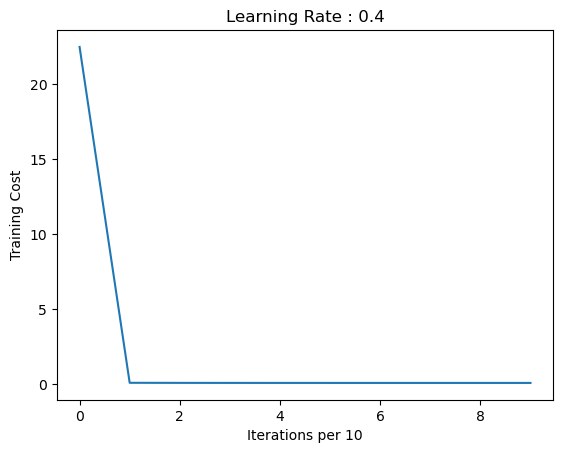

In [248]:
w,b = linear_regression_scratch(X_train,y_train,X_val,y_val,0.4,500)

In [249]:
column_name = 'gender'

# Step 1: Identify rows with null values in the specified column
gender_null = new_df_predicting_nan_values[new_df_predicting_nan_values[column_name].isnull()]

In [250]:
standard_scaler = StandardScaler()
gender_null_temp = gender_null.copy()
gender_null_temp[columns_to_normalize] = standard_scaler.fit_transform(gender_null[columns_to_normalize])

In [251]:
x_test = gender_null_temp.iloc[:, 7:]

In [252]:
predictions = forw_propogation(x_test.T, w, b)

In [256]:
rounded_predictions = np.round(predictions)

In [257]:
new_df_predicting_nan_values.loc[new_df_predicting_nan_values['gender'].isnull(), 'gender'] = rounded_predictions[0]

## As we have predicted the gender column, now we will predict the age column finally haha :)

In [261]:
# Define a mapping dictionary for age categories
age_mapping = {
    'teens': 0,
    'twenties': 1,
    'thirties': 2,
    'fourties': 3,
    'fifties': 4,
    'sixties': 5,
    'seventies': 6,
    'eighties': 7,
    'nineties': 8
}
new_df_predicting_nan_values['age'] = new_df_predicting_nan_values['age'].map(age_mapping)

In [262]:
new_df_predicting_nan_values_for_training = new_df_predicting_nan_values.copy()
new_df_predicting_nan_values_for_training.dropna(inplace=True)

In [266]:
new_df_predicting_nan_values_for_training[columns_to_normalize] = standard_scaler.fit_transform(new_df_predicting_nan_values_for_training[columns_to_normalize])

In [267]:
X = new_df_predicting_nan_values_for_training.iloc[:, 7:]
y = new_df_predicting_nan_values_for_training['age']

In [268]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=5)

In [269]:
X_train = X_train.T
y_train = np.array([y_train])
X_val = X_val.T
y_val = np.array([y_val])

Iteration No. 1
Training Cost : 21.564937999982828
Validation Cost : 6.706320000255109
Training Mean Squared Error (MSE) : 43.129875999965655
Validation Mean Squared Error (MSE) : 13.412640000510217
Iteration No. 2
Training Cost : 6.362547431581742
Validation Cost : 2.6743299523686566
Training Mean Squared Error (MSE) : 12.725094863163484
Validation Mean Squared Error (MSE) : 5.348659904737313
Iteration No. 3
Training Cost : 2.683558454495919
Validation Cost : 1.7686708623072427
Training Mean Squared Error (MSE) : 5.367116908991838
Validation Mean Squared Error (MSE) : 3.5373417246144854
Iteration No. 4
Training Cost : 1.705921003480801
Validation Cost : 1.4528032365313153
Training Mean Squared Error (MSE) : 3.411842006961602
Validation Mean Squared Error (MSE) : 2.9056064730626305
Iteration No. 5
Training Cost : 1.415392973289484
Validation Cost : 1.3579499499929677
Training Mean Squared Error (MSE) : 2.830785946578968
Validation Mean Squared Error (MSE) : 2.7158998999859354
Iteration

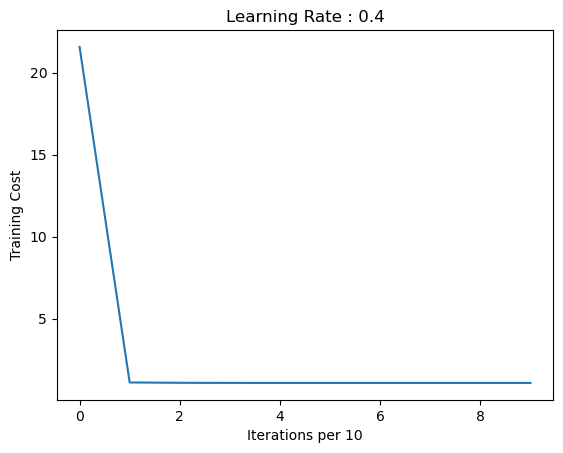

In [270]:
w,b = linear_regression_scratch(X_train,y_train,X_val,y_val,0.4,500)

In [272]:
column_name = 'age'

# Step 1: Identify rows with null values in the specified column
age_null = new_df_predicting_nan_values[new_df_predicting_nan_values[column_name].isnull()]

In [273]:
standard_scaler = StandardScaler()
age_null_temp = age_null.copy()
age_null_temp[columns_to_normalize] = standard_scaler.fit_transform(age_null[columns_to_normalize])

In [274]:
x_test = age_null_temp.iloc[:, 7:]

In [276]:
predictions = forw_propogation(x_test.T, w, b)

In [277]:
rounded_predictions = np.round(predictions)

In [278]:
new_df_predicting_nan_values.loc[new_df_predicting_nan_values['age'].isnull(), 'age'] = rounded_predictions[0]

In [280]:
new_df_predicting_nan_values.isnull().sum()

filename              0
text                  0
up_votes              0
down_votes            0
age                   0
gender                0
accent                0
F0_Mean               0
F0_Median             0
F0_Std                0
F0_5th_Percentile     0
F0_95th_Percentile    0
Loudness              0
Number_of_Words       0
Duration              0
Words_per_Second      0
Tempo                 0
STFT_Mean             0
STFT_Median           0
STFT_Std              0
MFCC                  0
dtype: int64

## FINALLY ALL OUR VALUES ARE PREDICTED. NOW WE SHALL FIND THE TRUE AND FINAL ERROR! AND RUN OUR FINAL MODEL

In [325]:
columns_to_normalize = [
    'accent',
    'F0_Mean', 'F0_Median', 'F0_Std', 'F0_5th_Percentile', 'F0_95th_Percentile',
    'Loudness', 'Number_of_Words', 'Duration', 'Words_per_Second', 'Tempo',
    'STFT_Mean', 'STFT_Median', 'STFT_Std', 'MFCC'
]

In [326]:
final_df = new_df_predicting_nan_values.copy()

In [327]:
final_df[columns_to_normalize] = standard_scaler.fit_transform(final_df[columns_to_normalize])

In [328]:
X = final_df.iloc[:, 5:]
y = final_df['age']

In [329]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (14997, 16)
Shape of y: (14997,)


In [331]:
X.isnull().sum()

gender                0
accent                0
F0_Mean               0
F0_Median             0
F0_Std                0
F0_5th_Percentile     0
F0_95th_Percentile    0
Loudness              0
Number_of_Words       0
Duration              0
Words_per_Second      0
Tempo                 0
STFT_Mean             0
STFT_Median           0
STFT_Std              0
MFCC                  0
dtype: int64

In [332]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state=5)

In [333]:
X_train = X_train.T
y_train = np.array([y_train])
X_val = X_val.T
y_val = np.array([y_val])

Iteration No. 1
Training Cost : 9.045011761802549
Validation Cost : 2.6497257987582996
Training Mean Squared Error (MSE) : 18.090023523605097
Validation Mean Squared Error (MSE) : 5.299451597516599
Iteration No. 2
Training Cost : 2.6912798863690104
Validation Cost : 1.573868993997156
Training Mean Squared Error (MSE) : 5.382559772738021
Validation Mean Squared Error (MSE) : 3.147737987994312
Iteration No. 3
Training Cost : 1.593622986490957
Validation Cost : 1.1841958260353227
Training Mean Squared Error (MSE) : 3.187245972981914
Validation Mean Squared Error (MSE) : 2.3683916520706454
Iteration No. 4
Training Cost : 1.1905888766041528
Validation Cost : 1.010164399401545
Training Mean Squared Error (MSE) : 2.3811777532083056
Validation Mean Squared Error (MSE) : 2.02032879880309
Iteration No. 5
Training Cost : 1.0086220382643614
Validation Cost : 0.9121515083836396
Training Mean Squared Error (MSE) : 2.0172440765287227
Validation Mean Squared Error (MSE) : 1.8243030167672791
Iteration 

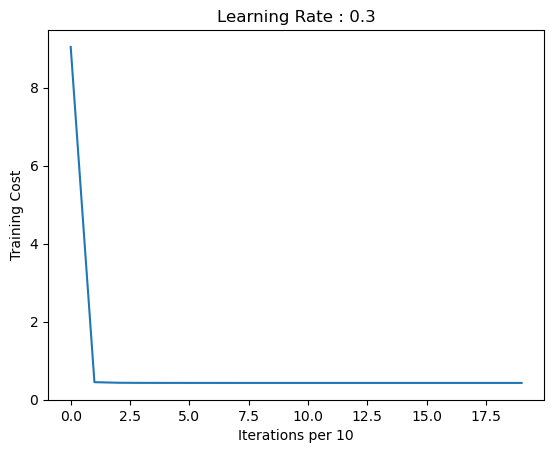

In [334]:
w,b = linear_regression_scratch(X_train,y_train,X_val,y_val,0.3,1000)